# Credit EDA Case Study

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Problem Statement

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
pd.set_option("display.max_columns", None) # shows all the number of columns # None: No limit - all columns
pd.set_option("display.max_rows", None) # shows all the number of rows # None: No limit - all rows

#### Reading the given data sets through pandas
- Application data as App
- Previous Application data as pre_App

#### Reading Application Data

In [4]:
App = pd.read_csv("application_data.csv")
App.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
App.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [6]:
App.shape #tells us the no. of rows and no. of columns in the data frame

(307511, 122)

In [7]:
App.info(verbose=True) #tells us concise summary of the data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
App.describe() #tells us the statistical information of the numerical columns in the data frame

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## Data Cleaning
Identify values that indicate missing data, for example, treat blank strings, "NA", "XNA", "XX", "999", etc., as missing.
 Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
 
#### Types of missing values:

#### MCAR: It stands for missing complete at random.(the reason behind the missing value is not dependent on any other feature)
#### MAR: It stands for missing at random.(the reason behind the missing value may be associated with some other features)
#### MNAR: It stands for missing not at randoml(there is a specific reason behind the missing value)
ue).

In [9]:
#checking the missing values 
App.isnull().mean()*100 #tells us about the percentage of missing values in different columns

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [10]:
#Columns with more than 40% of missing values, its better to drop them
cols_to_drop= App.columns[100*App.isnull().mean()>40] #whenever we have a high percentage of missing values column then we should discard that column.
                                                       
print(cols_to_drop)
print(len(cols_to_drop))

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

There are 49 columns having more than 40% of null values

In [11]:
#Drop columns having more than 40% of missing values
App1 = App.drop(cols_to_drop, axis=1)

In [12]:
App1.shape

(307511, 73)

In [13]:
100*App1.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [14]:
# Converting the data types of some of the columns that shouldn't be float data-type.

App1['DAYS_REGISTRATION'] = App1['DAYS_REGISTRATION'].astype(int,errors='ignore')
App1['CNT_FAM_MEMBERS'] = App1['CNT_FAM_MEMBERS'].astype(int,errors='ignore')
App1['OBS_30_CNT_SOCIAL_CIRCLE'] = App1['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
App1['DEF_30_CNT_SOCIAL_CIRCLE'] = App1['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
App1['OBS_60_CNT_SOCIAL_CIRCLE'] = App1['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
App1['DEF_60_CNT_SOCIAL_CIRCLE'] = App1['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
App1['AMT_REQ_CREDIT_BUREAU_HOUR'] = App1['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int,errors='ignore')
App1['AMT_REQ_CREDIT_BUREAU_DAY'] = App1['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int,errors='ignore')
App1['AMT_REQ_CREDIT_BUREAU_WEEK'] = App1['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int,errors='ignore')
App1['AMT_REQ_CREDIT_BUREAU_MON'] = App1['AMT_REQ_CREDIT_BUREAU_MON'].astype(int,errors='ignore')
App1['AMT_REQ_CREDIT_BUREAU_QRT'] = App1['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int,errors='ignore')
App1['AMT_REQ_CREDIT_BUREAU_YEAR'] = App1['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int,errors='ignore')

In [15]:
App1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

Observations
- The "flag_document" column lacks relevant information and will be dropped to enhance analysis effectiveness.

In [16]:
#making list of flag_document columns for drop
drop_column=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [17]:
# Dropping the flag_documents columns and storing it in new dataframes which will be used for further analysis
App2 = App1.drop(columns=drop_column)
App2.shape

(307511, 53)

#### Identifying & Making list of categorical columns and numerical columns 
-Imputation works as 
- for numerical columns (mean & median)
- for categorical columns (mode)

In [18]:
cat_columns=list(App2.dtypes[App2.dtypes=='object'].index) #gives us list if categorical columns
num_columns=list(App2.dtypes[App2.dtypes!='object'].index) #give us list of numerical columns

In [54]:
cat_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [25]:
num_columns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

### Observation
- By looking at cat_columns & num_columns, we can say that its not rightly represent the categorical variables and numerical variables so we have to correct it by analysing number of unique values each column has. 

In [19]:
# finding count of unique values in each column
print(App2.nunique().sort_values())

FLAG_EMAIL                          2
REG_REGION_NOT_LIVE_REGION          2
FLAG_PHONE                          2
FLAG_CONT_MOBILE                    2
FLAG_WORK_PHONE                     2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_OWN_CAR                        2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_REALTY                     2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CRED

Looking at the data we can consider the columns with 3 or less than 3 unique values as Categorical Columns.

In [20]:
# conversion of columns integer having less than 3 unique values into categorical
for col in App2.columns:
    if App2[col].nunique() <= 3: # here considering columns with 3 unique values as categorical variables
        App2[col] = App2[col].astype(object)

App2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  object 
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [21]:
#Updated categorical columns & numerical columns
u_cat_columns=list(App2.dtypes[App2.dtypes=='object'].index) #gives us list if categorical columns
u_num_columns=list(App2.dtypes[App2.dtypes!='object'].index) #give us list of numerical columns

In [24]:
u_cat_columns

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE']

In [25]:
u_num_columns

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [22]:
App2[u_cat_columns].isnull().mean()*100

TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                31.345545
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WOR

By analysing u_cat_columns it was observed 'OCCUPATION_TYPE' plays vital role in deciding weather the customer will able to repay loan or not. Hence it becomes crucial to analyse and handle missing values for this particular column.

In [23]:
App2['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

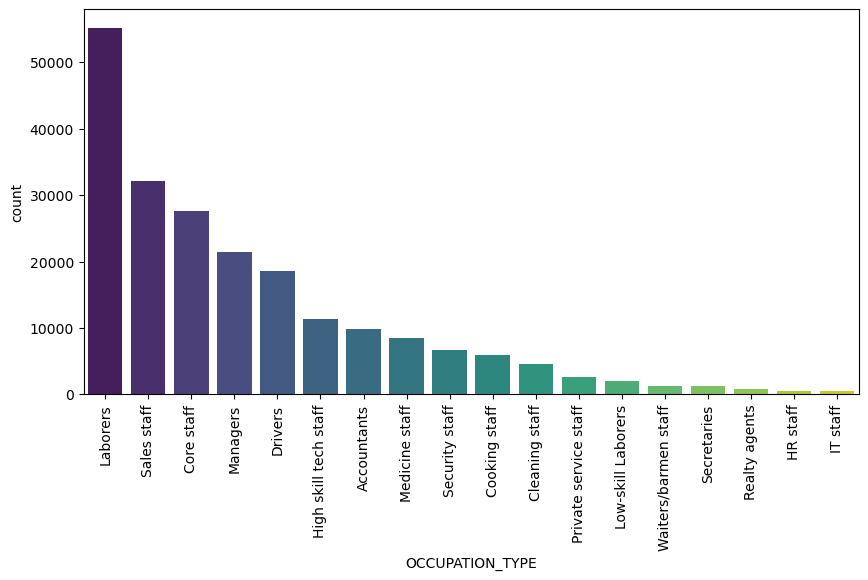

In [24]:
#plotting the OCCUPATION_TYPE with seaborn visualisation
plt.figure(figsize = (10,5))
sns.barplot(App2['OCCUPATION_TYPE'].value_counts(), palette="viridis")
plt.xticks(rotation = 90)
plt.show()

 Observation (ignoring the null values coz if we impute the null values by mode it'll exaggerate the data)
- laborers has the highest number of loan applicants.
- Realty Agents, HR staff, IT staff has the lowest loan applicants.
- 31.345% of "OCCUPATION_TYPE" is null values, so its better to impute these null values in 'unknown category' within OCCUPATION_TYPE column.

In [25]:
App2['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

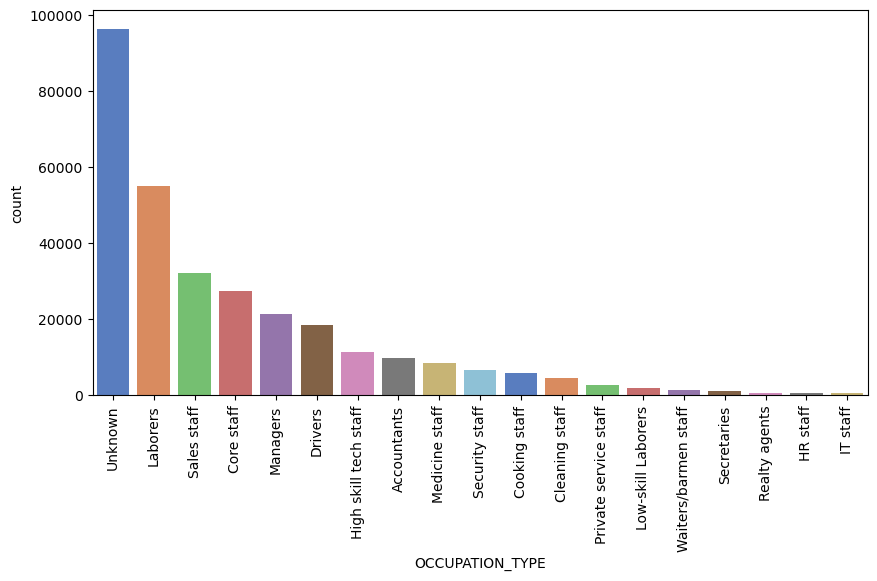

In [26]:
#plotting after imputing the null values in "unknown category" of OCCUPATION_TYPE column.
plt.figure(figsize = (10,5))
sns.barplot(App2['OCCUPATION_TYPE'].value_counts(), palette="muted")
plt.xticks(rotation = 90)
plt.show()

In [20]:
App2[u_cat_columns].isnull().mean()*100

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.345545
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
dtype: float64

In [27]:
for col in u_cat_columns:
    mod=App2[col].mode()[0] # most frequently occuring value
    App2[col]=App2[col].fillna(mod) #imputation
# We are replacing missing values with mode in case of categorical columns

In [28]:
App2[u_cat_columns].isnull().mean()*100

TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
dtype: float64

In [29]:
App2['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

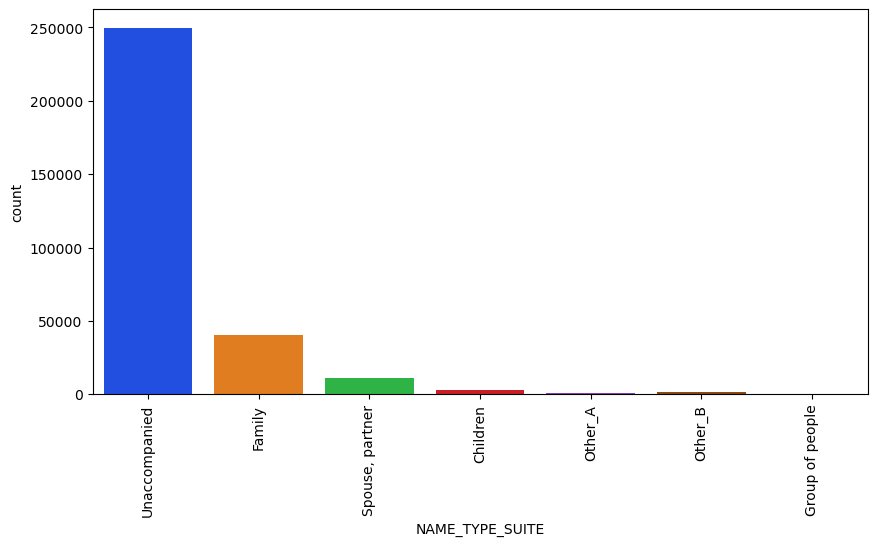

In [37]:
plt.figure(figsize = (10,5))
sns.countplot(data = App2, x = "NAME_TYPE_SUITE", palette="bright")
plt.xticks(rotation = 90)
plt.show()

- By looking at the plot we can say that "Unaccompanied" category of NAME_TYPE_SUITE column has the highest number of loan applicants.
- Therefore, this means the majority of loan applicants apply for loans independently.

### Standardising
- DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE cannot be -Ve numbers. Converting to absolute values

In [30]:
# converting negative DAYS_EMPLOYED value to positive value
App2['DAYS_EMPLOYED']=App2['DAYS_EMPLOYED'].abs()
# converting negative DAYS_REGISTRATION value to positive value
App2['DAYS_REGISTRATION']=App2['DAYS_REGISTRATION'].abs()
# converting negative DAYS_ID_PUBLISH value to positive value
App2['DAYS_ID_PUBLISH']=App2['DAYS_ID_PUBLISH'].abs()
# converting negative DAYS_LAST_PHONE_CHANGE value to positive value
App2['DAYS_LAST_PHONE_CHANGE']=App2['DAYS_LAST_PHONE_CHANGE'].abs()

In [31]:
#Converting DAYS_BIRTH to +ve and converting days to years. Column renamed to AGE_IN_YEARS
App2.DAYS_BIRTH=App2.DAYS_BIRTH.apply(lambda x: abs(x//365.25))
App2.rename({'DAYS_BIRTH':'AGE_IN_YEARS'}, axis=1, inplace=True)
App2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [32]:
# Binning AGE and Creating new column "AGE_GROUP"
App2['AGE_GROUP']= pd.cut(App2.AGE_IN_YEARS,bins=[15,25,35,45,55,65,75])
App2['AGE_GROUP'].value_counts(normalize=True)

AGE_GROUP
(35, 45]    0.274010
(25, 35]    0.235533
(45, 55]    0.228252
(55, 65]    0.196812
(15, 25]    0.039781
(65, 75]    0.025612
Name: proportion, dtype: float64

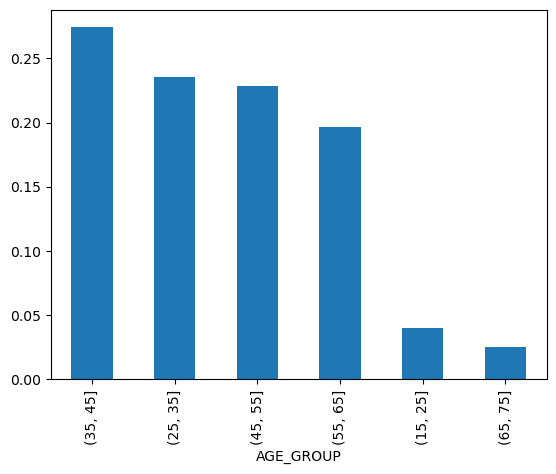

In [33]:
App2['AGE_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

- By looking at the plot we can say that 35-45 Age group is the largest Group of Age applying for loans.

In [34]:
# Binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"
App2['INCOME_GROUP']= pd.qcut(App2['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
App2['INCOME_GROUP'].value_counts(normalize=True)

INCOME_GROUP
Medium      0.274143
High        0.245562
Low         0.218486
VeryHigh    0.153224
VeryLow     0.108585
Name: proportion, dtype: float64

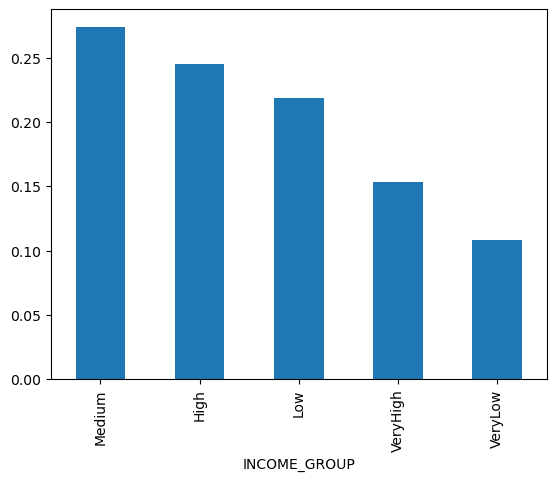

In [35]:
App2['INCOME_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

- By looking at the plot we can say the Medium Income group is the largest Group applying for loans.

In [36]:
# Binning AMT_CREDIT and creating new column  AMT_CREDIT_GROUP
App2['AMT_CREDIT_GROUP']= pd.qcut(App2['AMT_CREDIT'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
App2['AMT_CREDIT_GROUP'].value_counts(normalize=True)


AMT_CREDIT_GROUP
Medium      0.300019
High        0.208201
Low         0.192227
VeryHigh    0.191577
VeryLow     0.107977
Name: proportion, dtype: float64

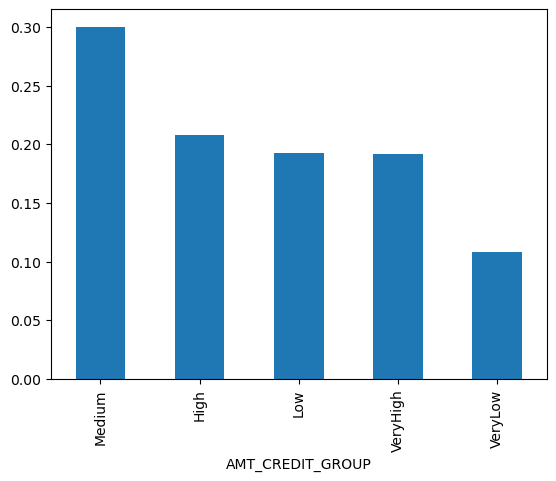

In [37]:
App2['AMT_CREDIT_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

### Analysis of six columns with 13.5% missing values
- AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
- AMT_REQ_CREDIT_BUREAU_DAY      13.501631
- AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
- AMT_REQ_CREDIT_BUREAU_MON      13.501631
- AMT_REQ_CREDIT_BUREAU_QRT      13.501631
- AMT_REQ_CREDIT_BUREAU_YEAR     13.501631

In [38]:
App2[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

As 13.5% is a significant amount of missing values, its better not to impute these values using mean, median and mode because it will result in bias to the data, so its better to leave it.

# ANALYSIS

In [39]:
#Checking the imbalance percentage.
App2.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

- 0 means non defaulter(no difficulty in paying back)
- 1 means defaulter(have difficulty)

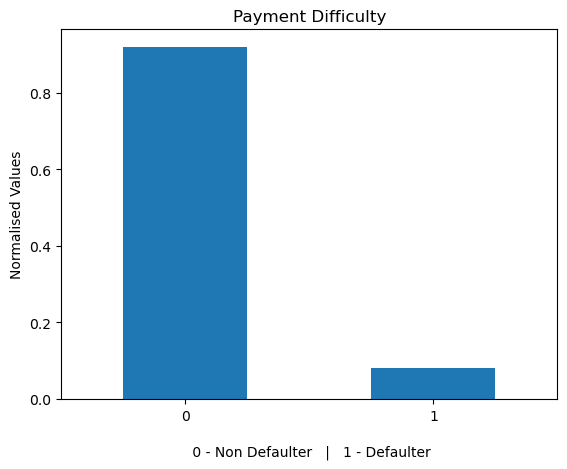

In [40]:
App2.TARGET.value_counts(normalize=True).plot.bar()
plt.title("Payment Difficulty")
plt.xlabel("\n 0 - Non Defaulter   |   1 - Defaulter")
plt.xticks(rotation =0)
plt.ylabel("Normalised Values")
plt.show()

In [41]:
#checking the Imbalance Ratio
App2[App2.TARGET==0].shape[0]/App2[App2.TARGET==1].shape[0]

11.387150050352467

- 1 in every 11 applicant has payment difficulty or is a defaulter.

# UNIVARIATE ANALYSIS

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


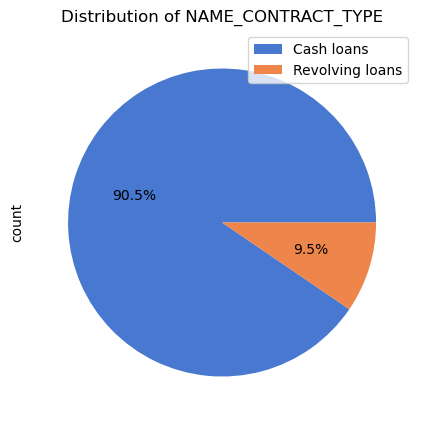

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


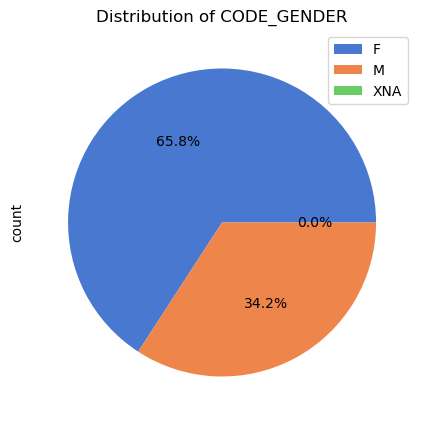

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64


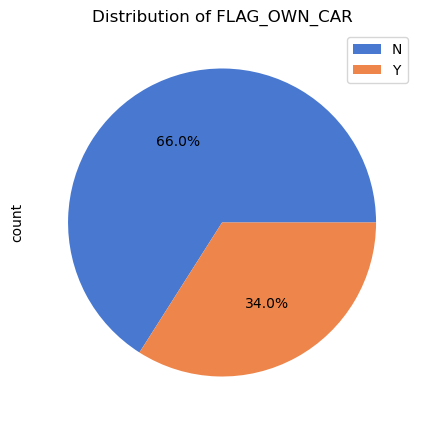

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


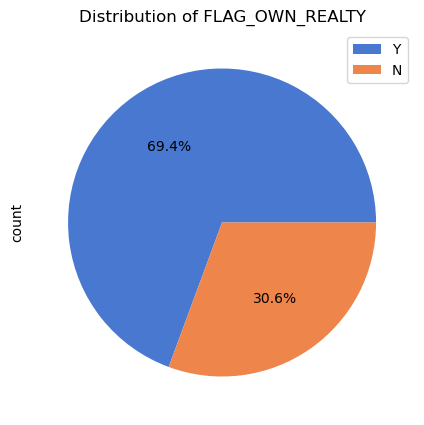

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64


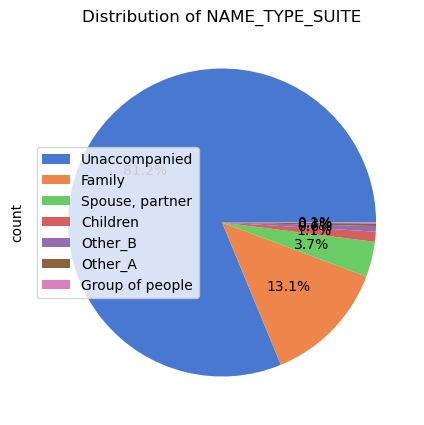

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


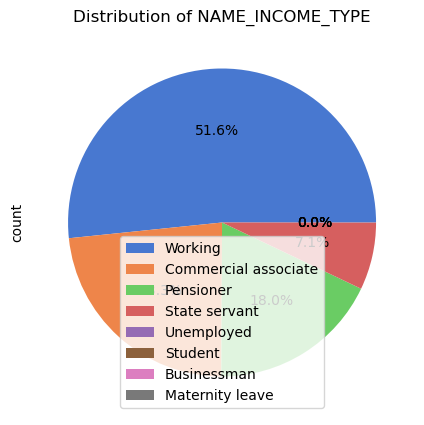

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64


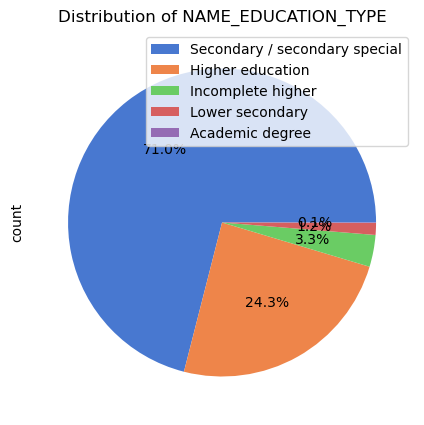

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64


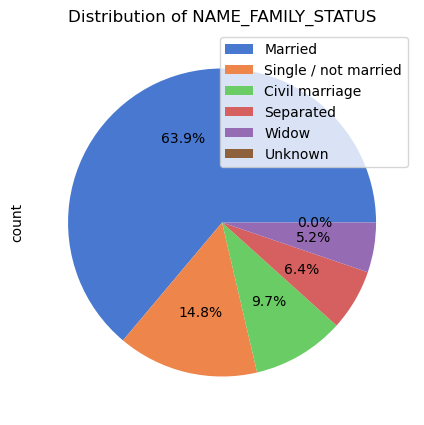

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64


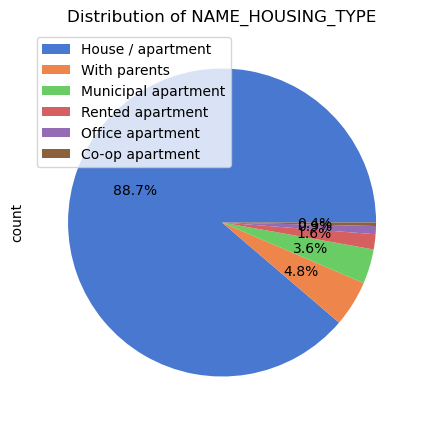

OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64


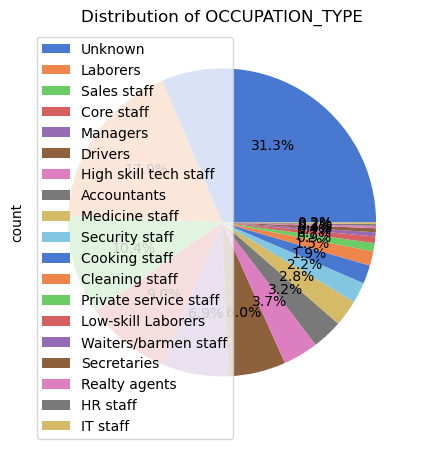

WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64


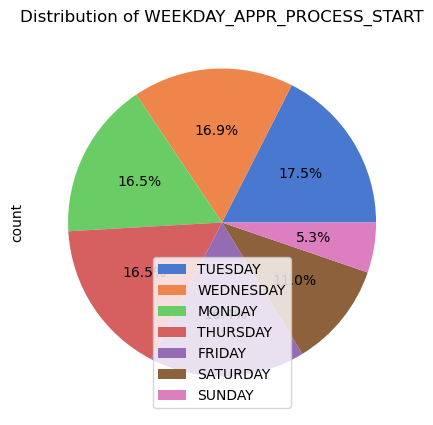

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

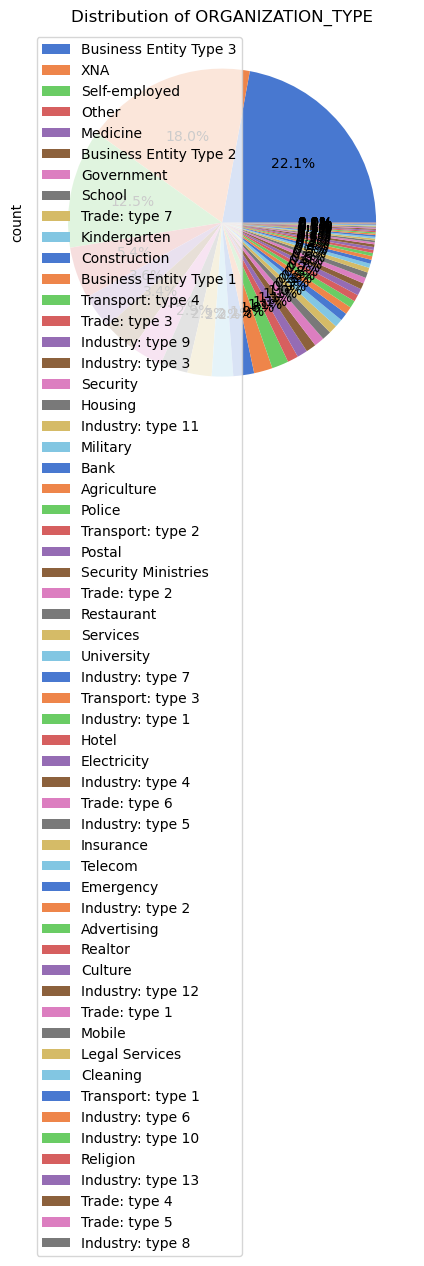

In [42]:
#Checking all object types Variables and their values
for col in App2.columns:
    if App2[col].dtype == "object":
        print(App2[col].value_counts(dropna=False))
        plt.figure(figsize=[5, 5])
        App2[col].value_counts(dropna=False).plot.pie(labeldistance=None, autopct='%1.1f%%', colors=sns.color_palette("muted"))
        plt.title(f'Distribution of {col}')
        plt.legend()
        plt.show()


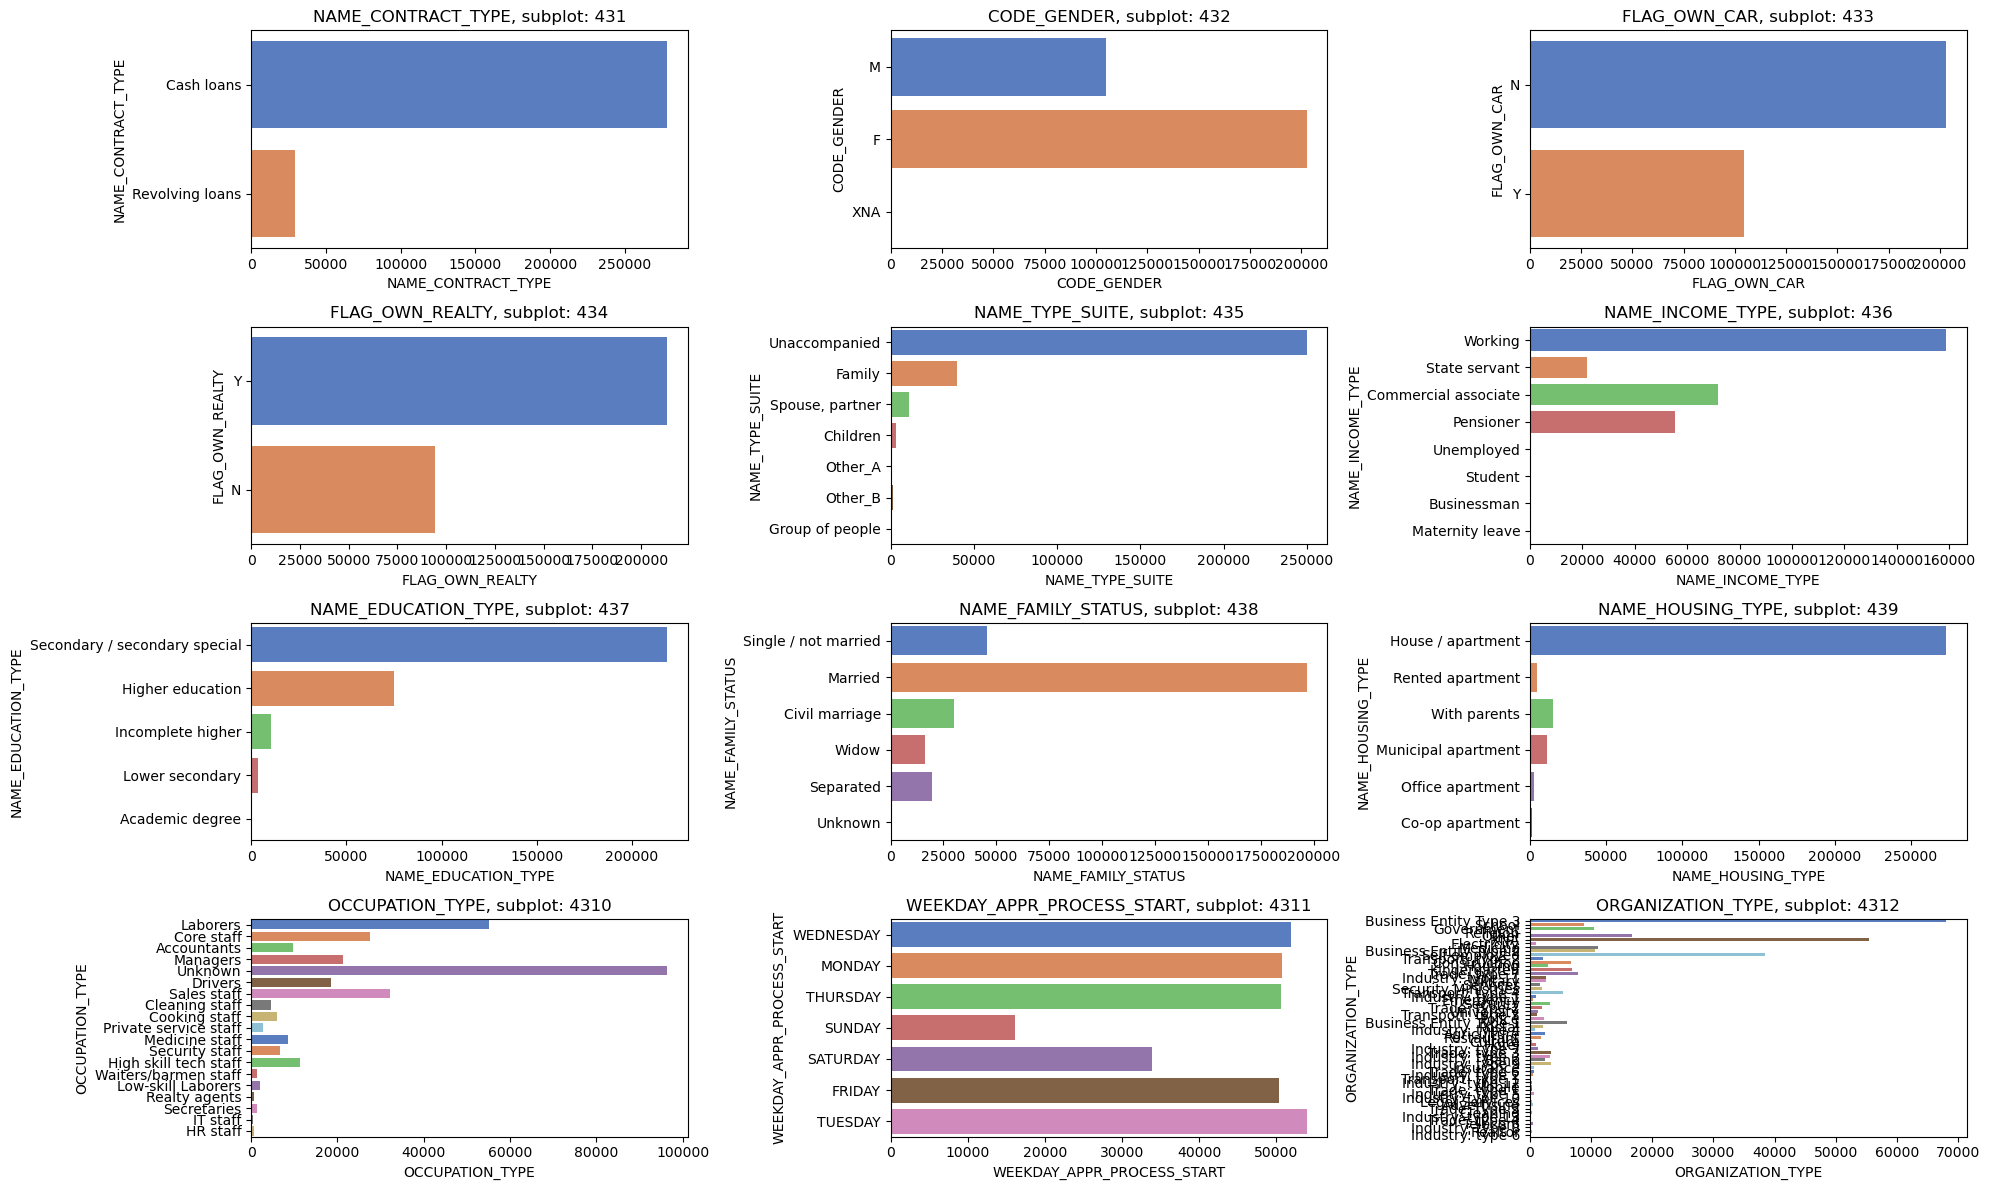

In [43]:
# Categorical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,12))

for i in App2.columns:
    if App2[i].dtypes=="object":

        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.countplot(App2[i],palette="muted")
        c = c + 1

fig.tight_layout()
plt.show()

Insights

- Cash loans are more prevalent than revolving loans, accounting for 90% of the total.

- A notable 65% of loan applicants are female, compared to 34% male.

- 65% of applicants do not own a car.

- 69% of applicants possess their own living quarters.

- 81% of applicants were unaccompanied when applying for a loan.

- Although most applicants are from the working class, 18% are retirees.

- 71% of applicants have completed secondary education.

- 63% of applicants are married.

- 31% of applicants did not specify their occupation type.

In [44]:
#DAYS_REGISTRATION, DAYS_ID_PUBLISH change to years. Columns Renamed


App2.DAYS_REGISTRATION = App2.DAYS_REGISTRATION.apply(lambda x: x//365.25)
App2.DAYS_ID_PUBLISH = App2.DAYS_ID_PUBLISH.apply(lambda x: x//365.25)
App2.rename({'DAYS_REGISTRATION':'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, axis=1, inplace=True)

In [45]:
App2.DAYS_EMPLOYED=App2.DAYS_EMPLOYED.apply(lambda x: x//365.25)
App2.rename({'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, axis=1, inplace=True)

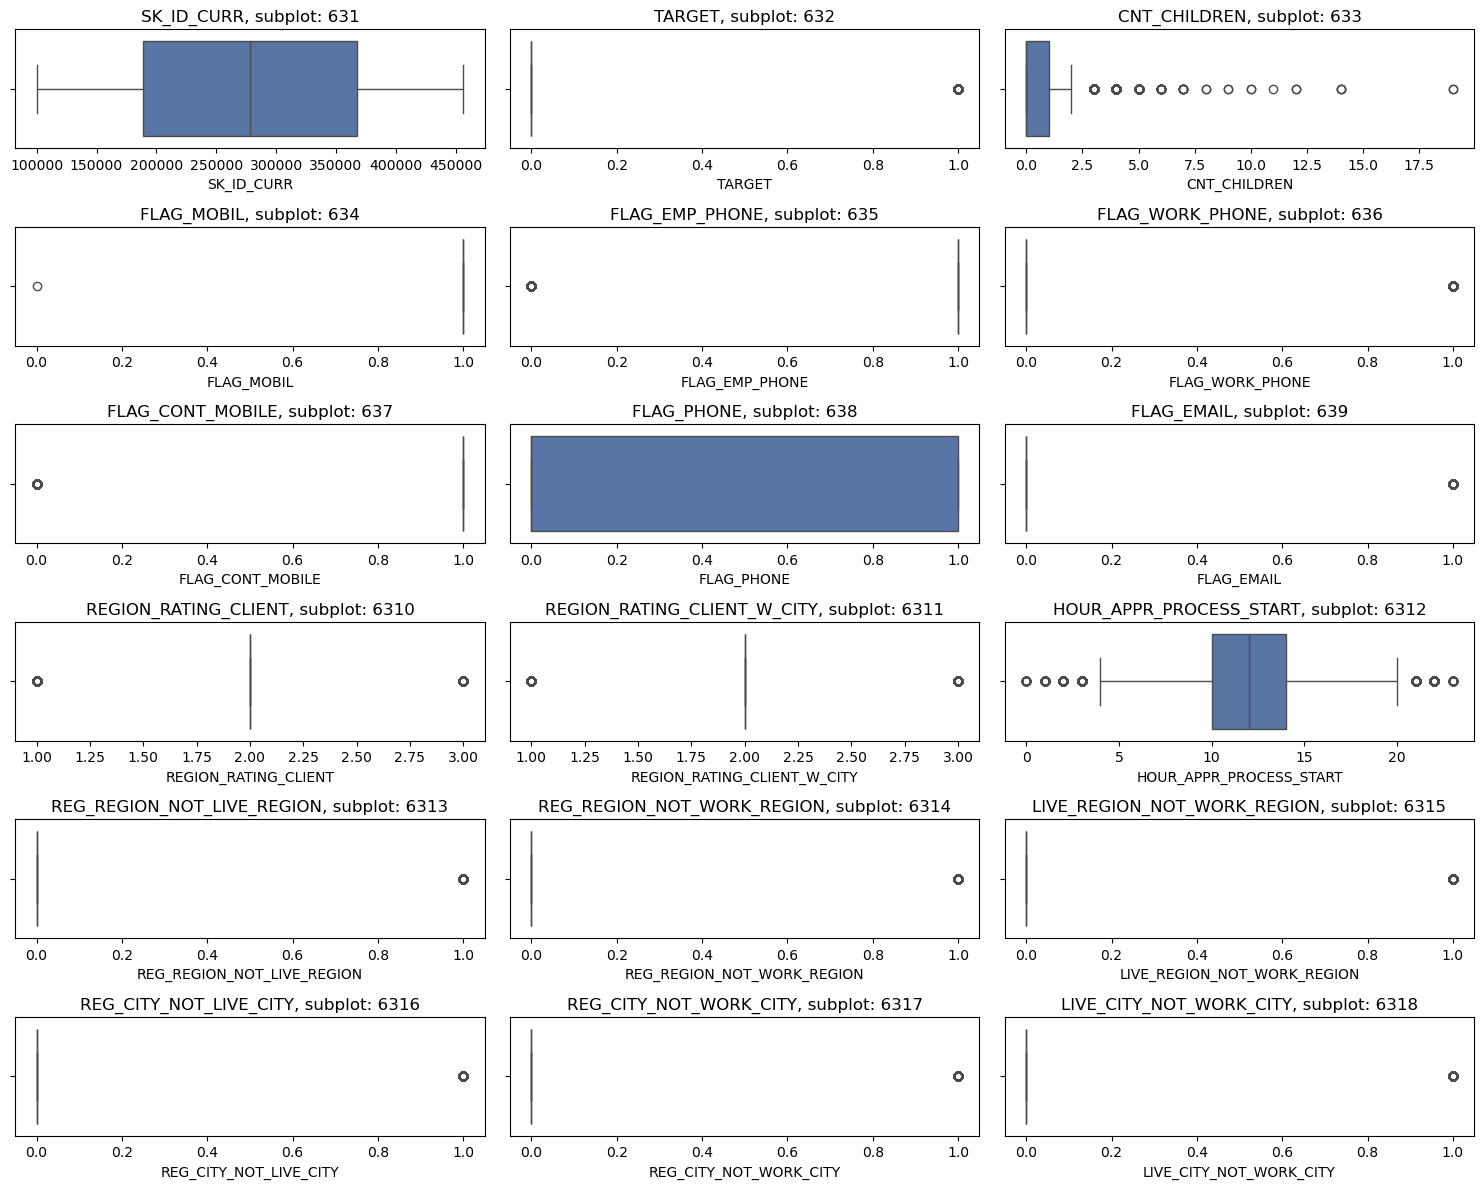

In [46]:
# INT Data - Analysis by plotting Box plots

a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15, 12))  

for i in App2.columns:
    if App2[i].dtypes == "int64" or App2[i].dtypes == "int32":
        plt.subplot(a, b, c)
        plt.title(f'{i}, subplot: {a}{b}{c}')
        plt.xlabel(i)
        sns.boxplot(x=App2[i], palette="deep")  
        c += 1

fig.tight_layout()
plt.show()


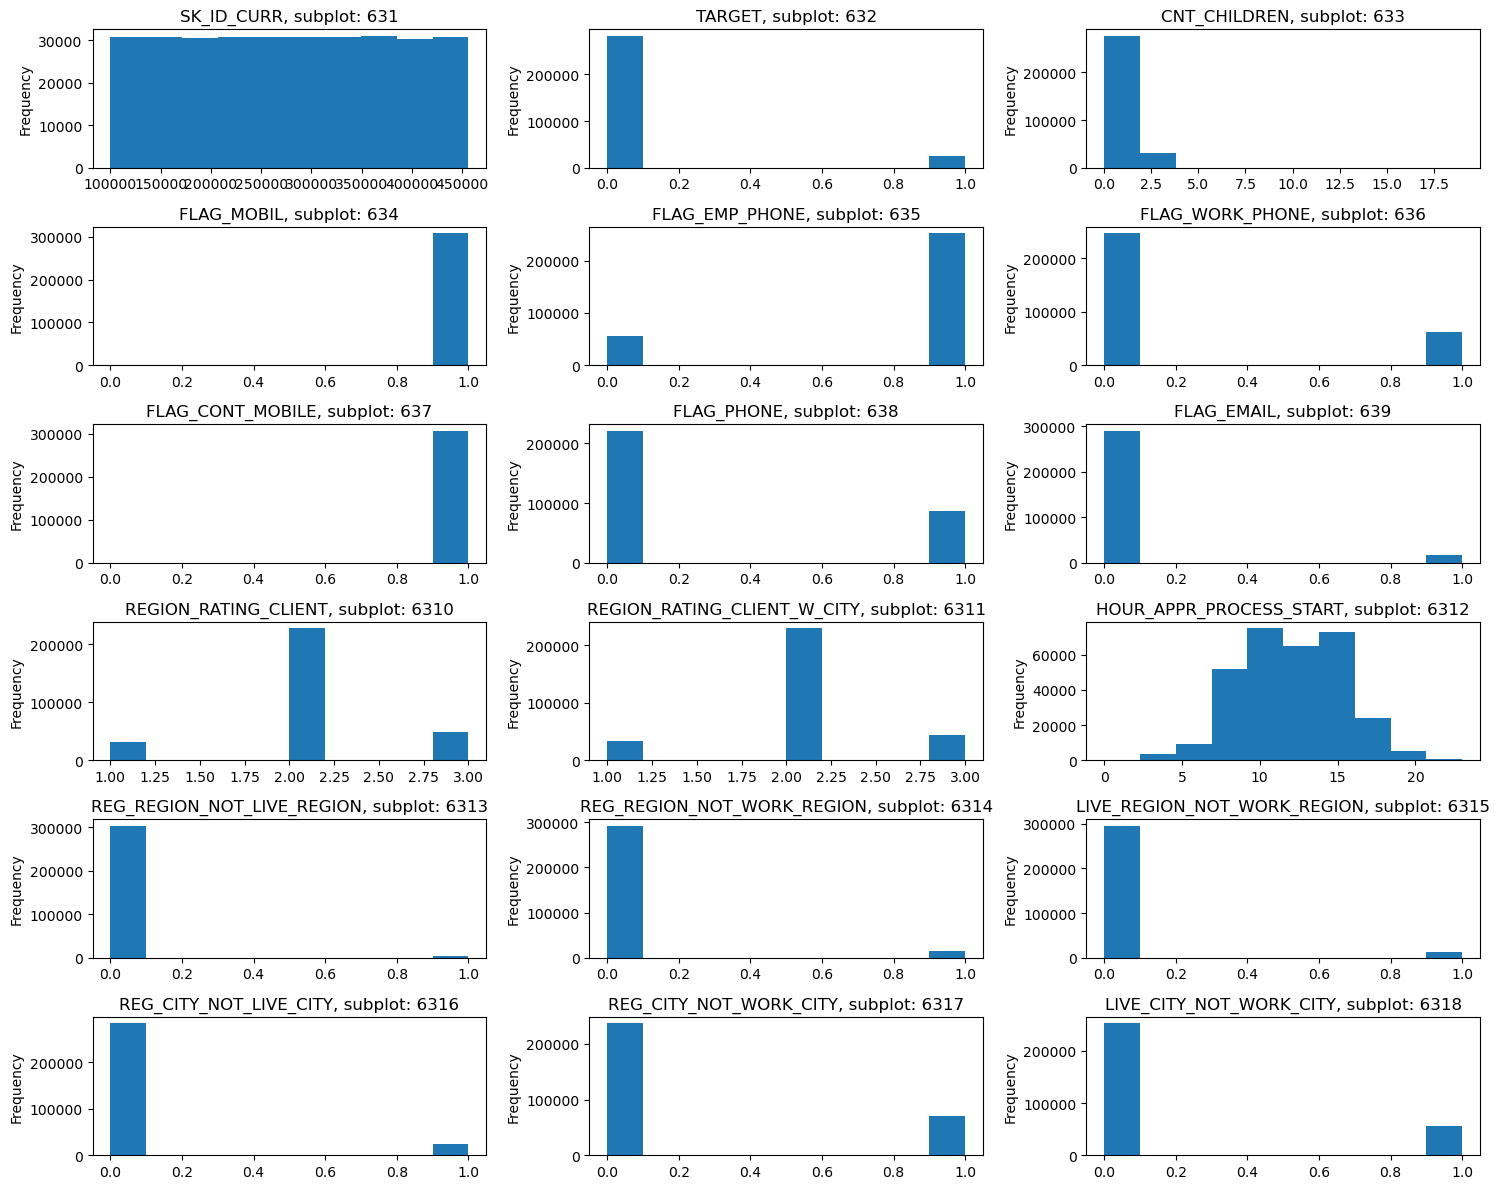

In [32]:

# INT Data - Histogram - Analysis by plotting Histograms

a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in App2.columns:
    if App2[i].dtypes=="int64" or App2[i].dtypes=="int32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        App2[i].plot.hist()
        c = c + 1

fig.tight_layout()
plt.show()

CNT_CHILDREN has outliers

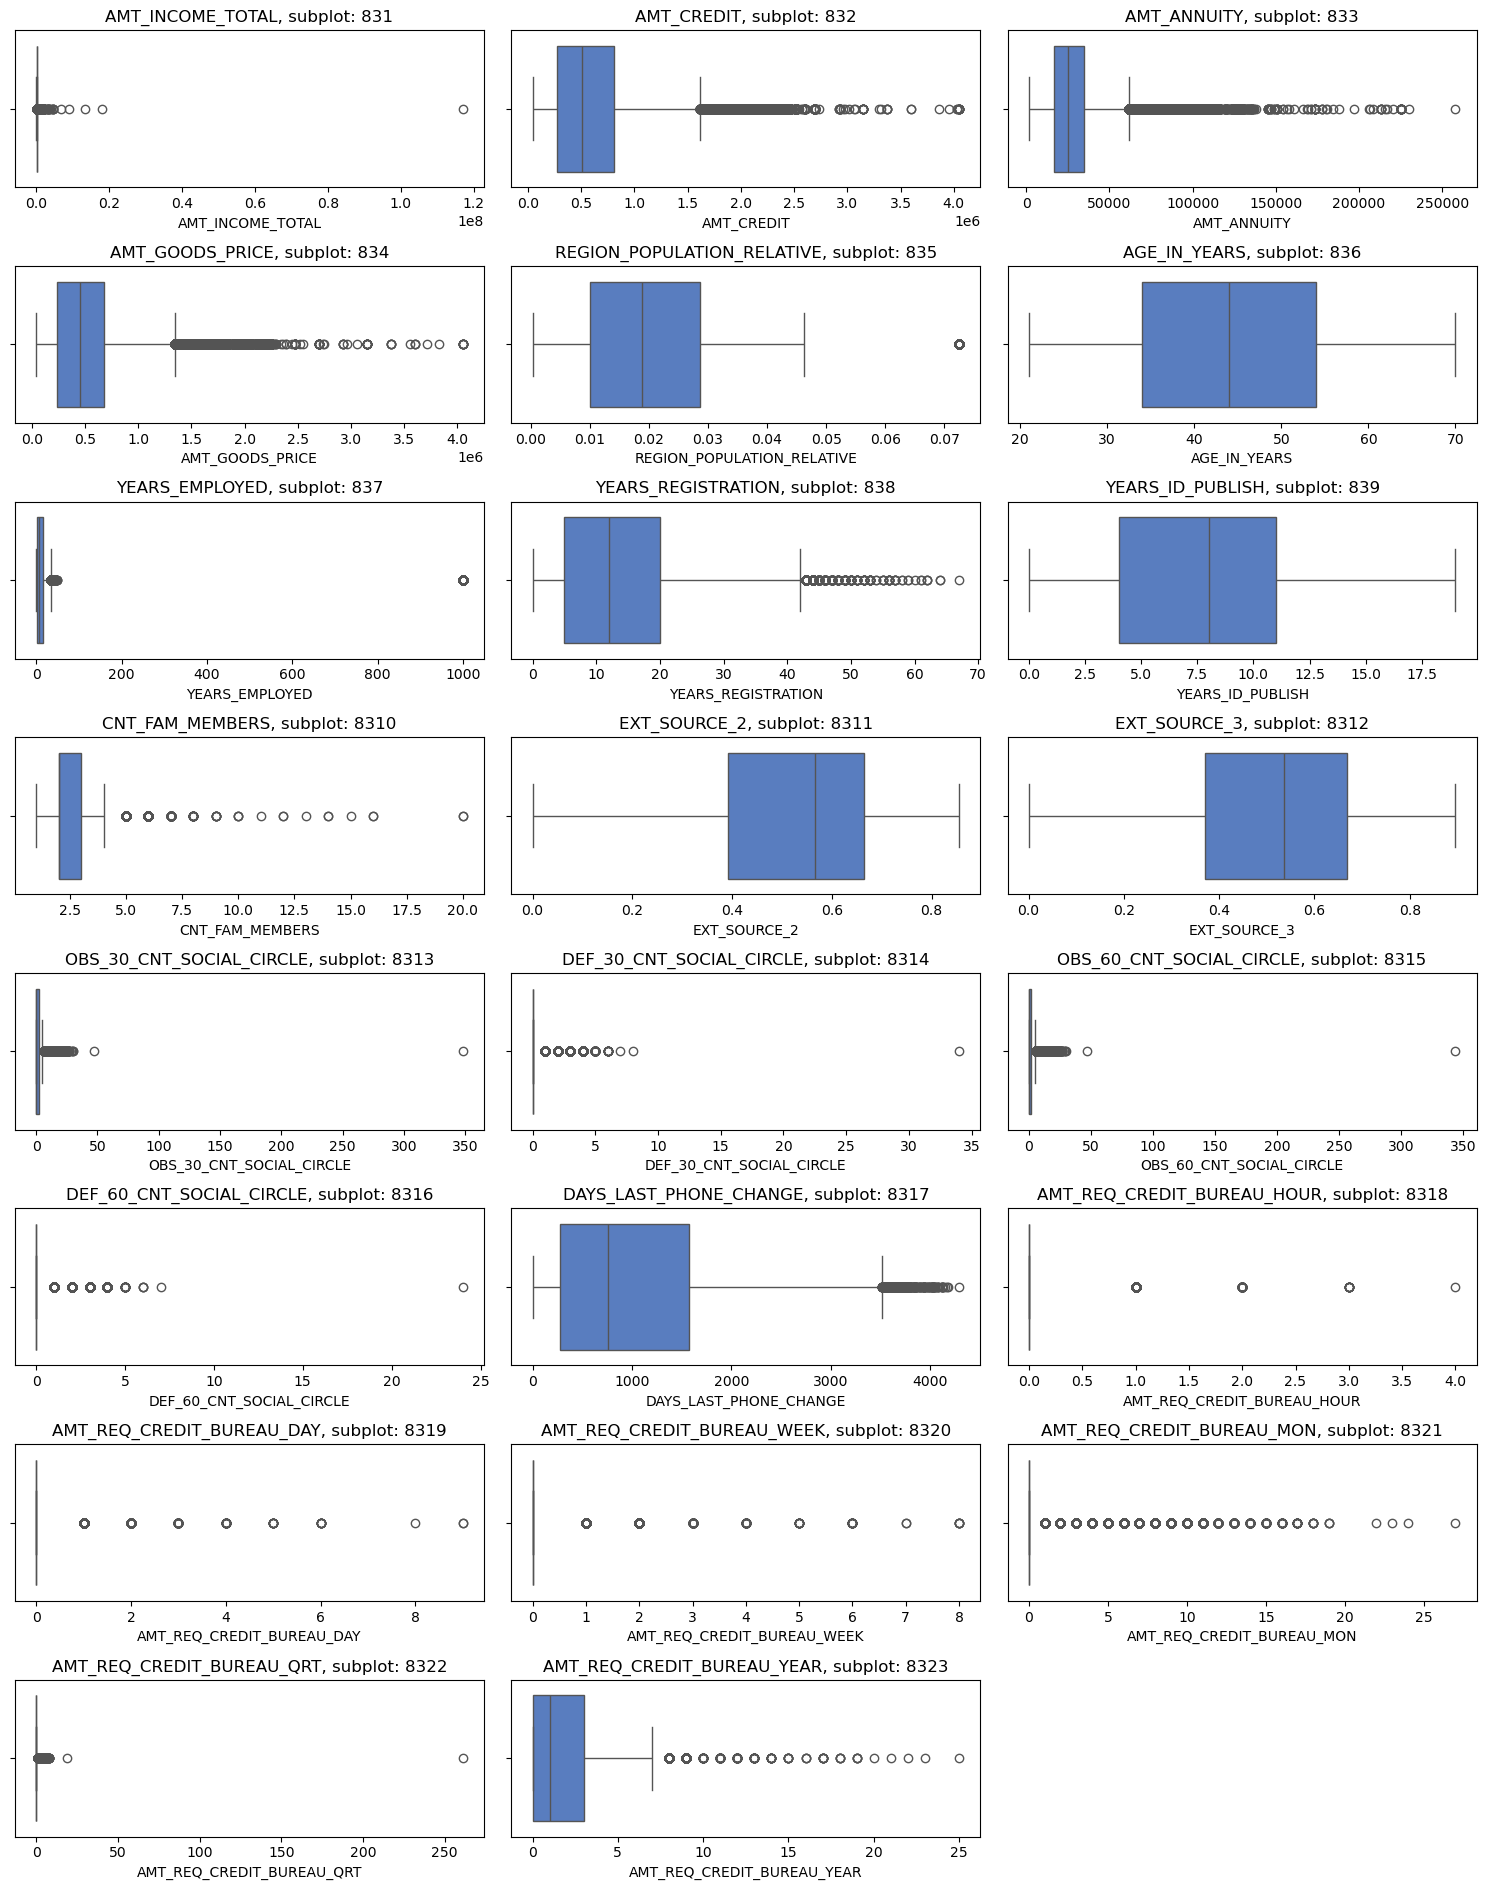

In [47]:
#Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15, 19))  

for i in App2.columns:
    if App2[i].dtypes == "float64" or App2[i].dtypes == "float32":
        plt.subplot(a, b, c)
        plt.title(f'{i}, subplot: {a}{b}{c}')
        plt.xlabel(i)
        sns.boxplot(x=App2[i], palette="muted") 
        c += 1

fig.tight_layout()
plt.show()


By looking at plots we can see outliers observed in 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_EMPLOYED','YEARS_REGISTRATION', DAYS_LAST_PHONE_CHANGE

In [48]:
# Divide the data into two sets, Target-1 and Target-0
App_target1 = App2[App2['TARGET']==1]
App_target0 = App2[App2['TARGET']==0]

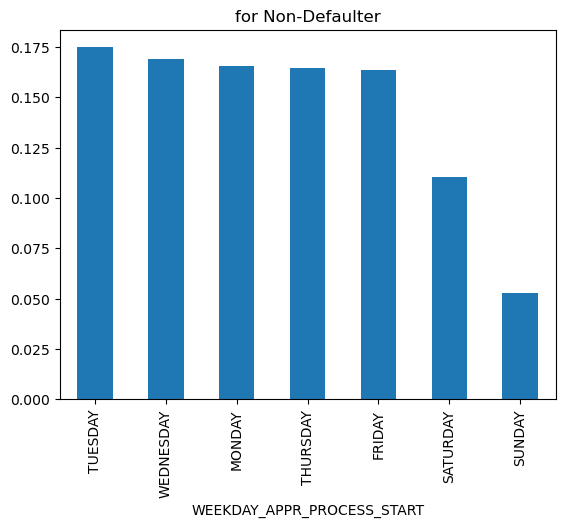

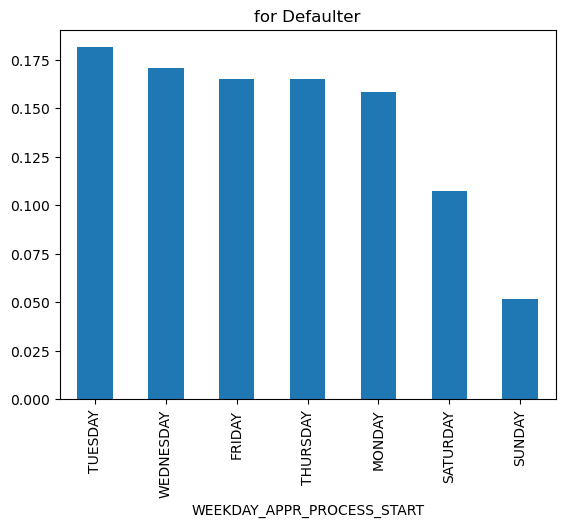

In [49]:
# Performing Univariate Analysis for categoriacal variables for both 0 and 1
# WEEKDAY_APPR_PROCESS_START (categorical ordered variable)
# for TARGET=0
App_target0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for Non-Defaulter')
plt.show()
# for TARGET=1
App_target1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for Defaulter')
plt.show()

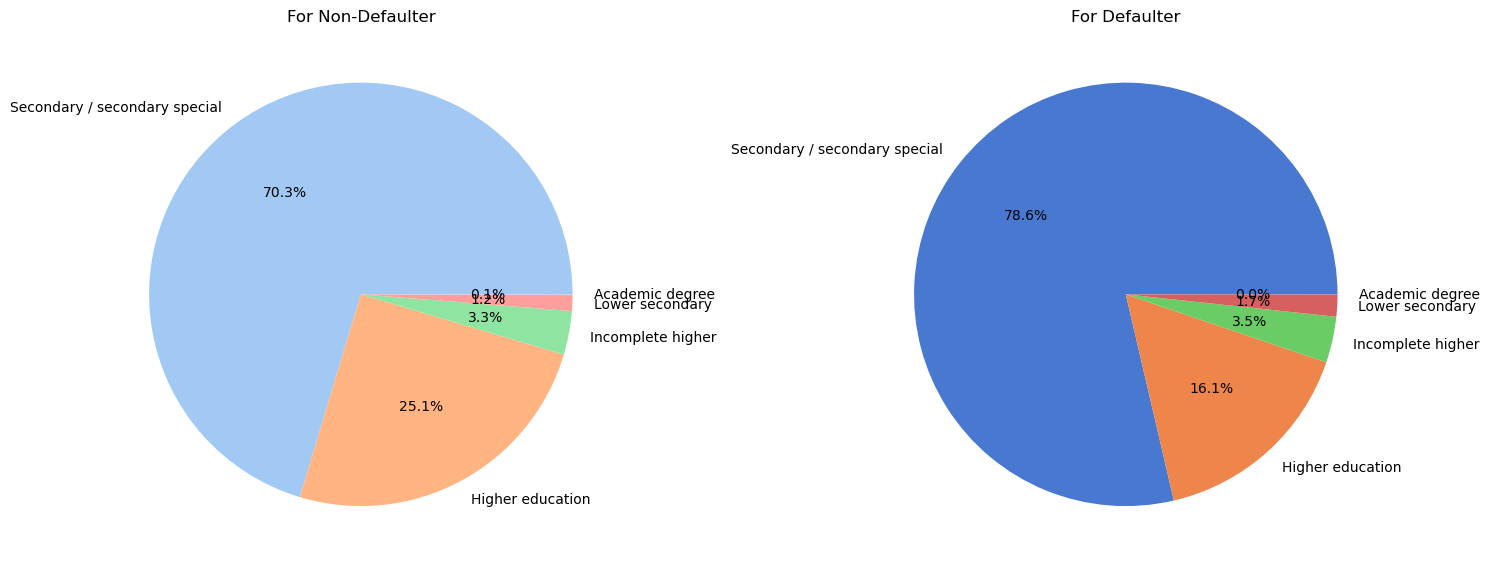

In [50]:
#plotting Name_Education_type
# For both Target=0 and Target=1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
App_target0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), ax=ax1)
ax1.set_title('For Non-Defaulter')
ax1.set_ylabel('') 

App_target1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', colors=sns.color_palette("muted"), ax=ax2)
ax2.set_title('For Defaulter')
ax2.set_ylabel('')  

plt.tight_layout()
plt.show()


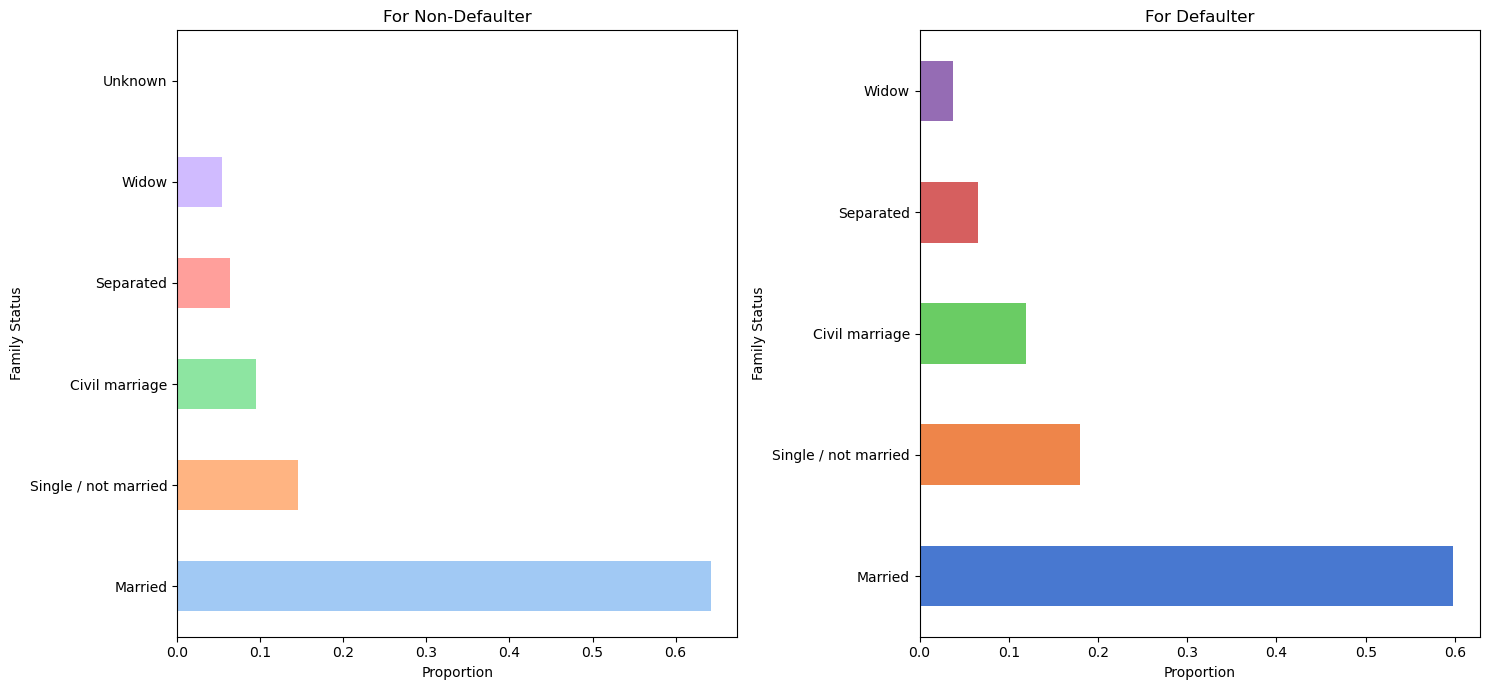

In [51]:
#plotting Name_Family_status
# For both TARGET=0 and TARGET=1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
App_target0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh(color=sns.color_palette("pastel"), ax=ax1)
ax1.set_title('For Non-Defaulter')
ax1.set_xlabel('Proportion')
ax1.set_ylabel('Family Status')

App_target1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh(color=sns.color_palette("muted"), ax=ax2)
ax2.set_title('For Defaulter')
ax2.set_xlabel('Proportion')
ax2.set_ylabel('Family Status')

plt.tight_layout()
plt.show()


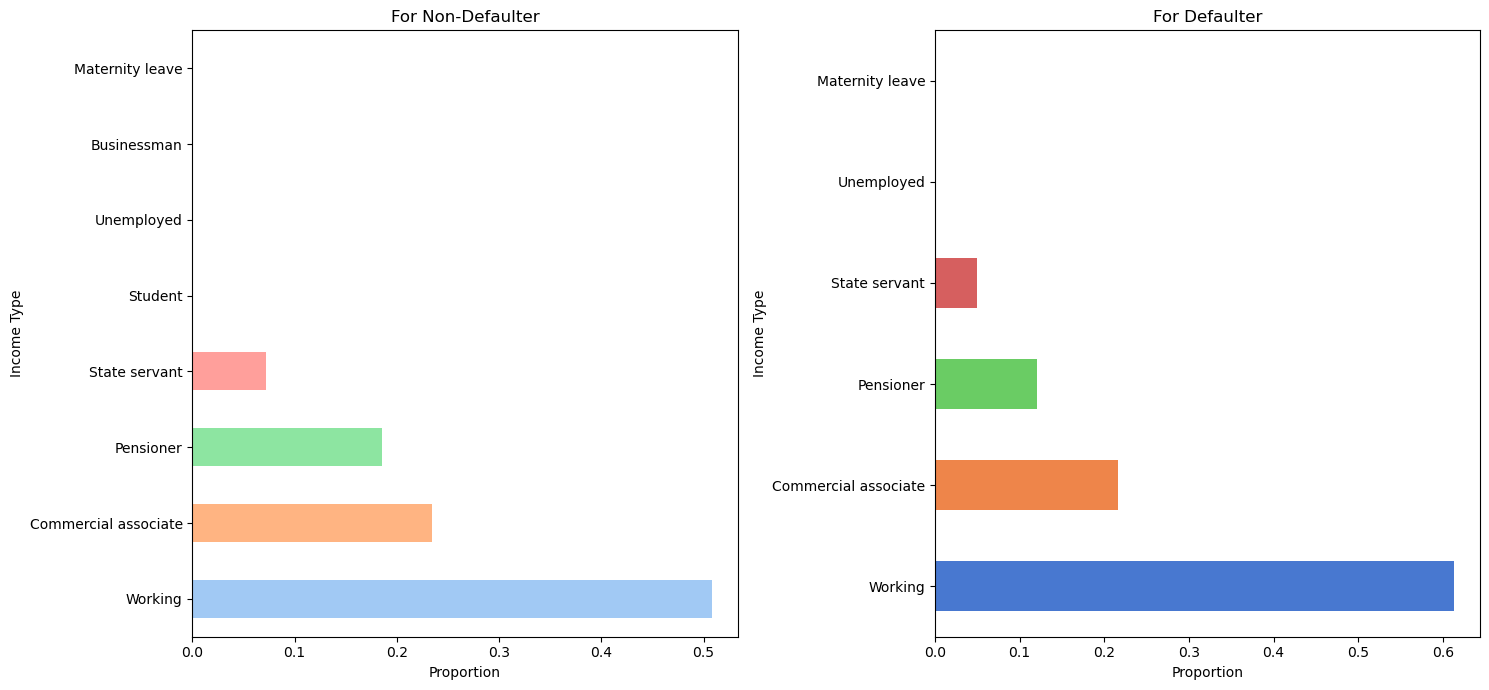

In [52]:
# NAME_INCOME_TYPE
# For both TARGET=0 and TARGET=1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

App_target0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh(color=sns.color_palette("pastel"), ax=ax1)
ax1.set_title('For Non-Defaulter')
ax1.set_xlabel('Proportion')
ax1.set_ylabel('Income Type')

App_target1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh(color=sns.color_palette("muted"), ax=ax2)
ax2.set_title('For Defaulter')
ax2.set_xlabel('Proportion')
ax2.set_ylabel('Income Type')

plt.tight_layout()
plt.show()


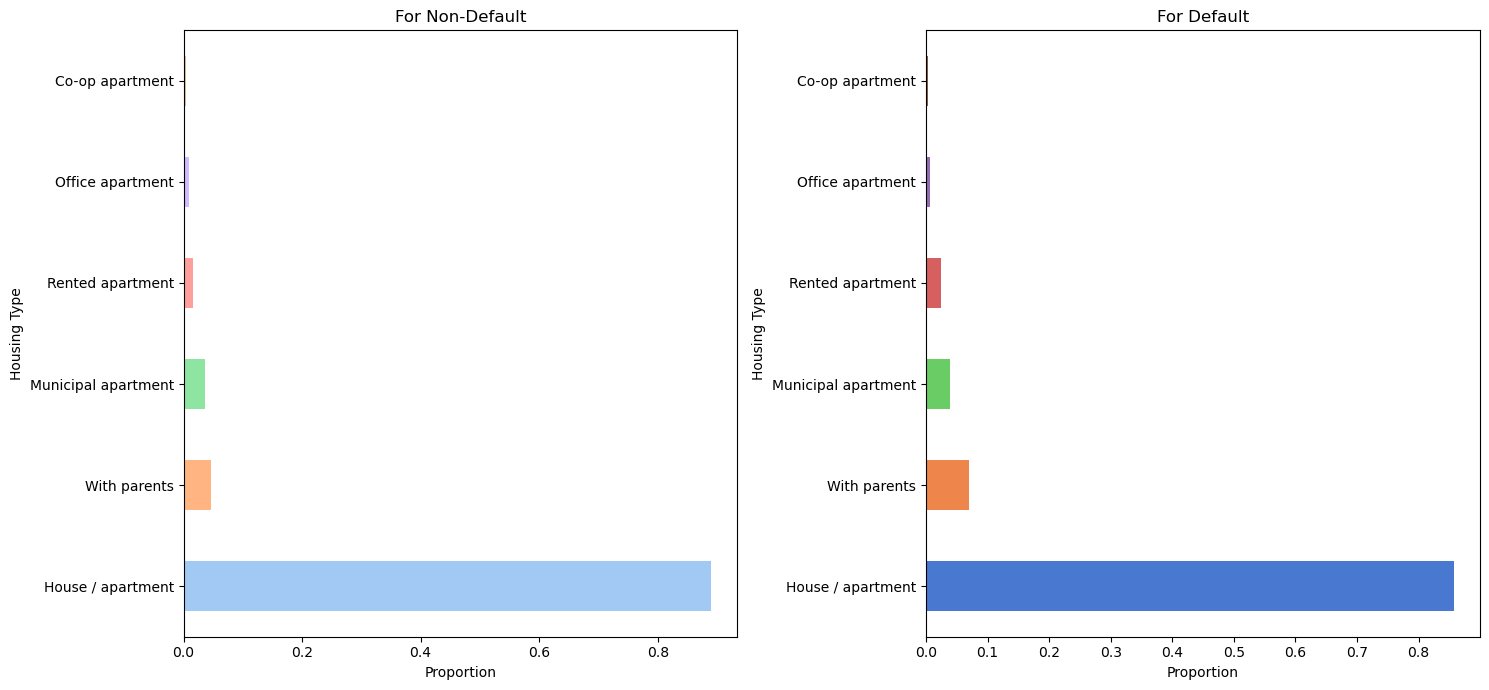

In [53]:
# NAME_HOUSING_TYPE
# For both TARGET=0 and TARGET=1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

App_target0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh(color=sns.color_palette("pastel"), ax=ax1)
ax1.set_title('For Non-Default')
ax1.set_xlabel('Proportion')
ax1.set_ylabel('Housing Type')

App_target1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh(color=sns.color_palette("muted"), ax=ax2)
ax2.set_title('For Default')
ax2.set_xlabel('Proportion')
ax2.set_ylabel('Housing Type')

plt.tight_layout()
plt.show()


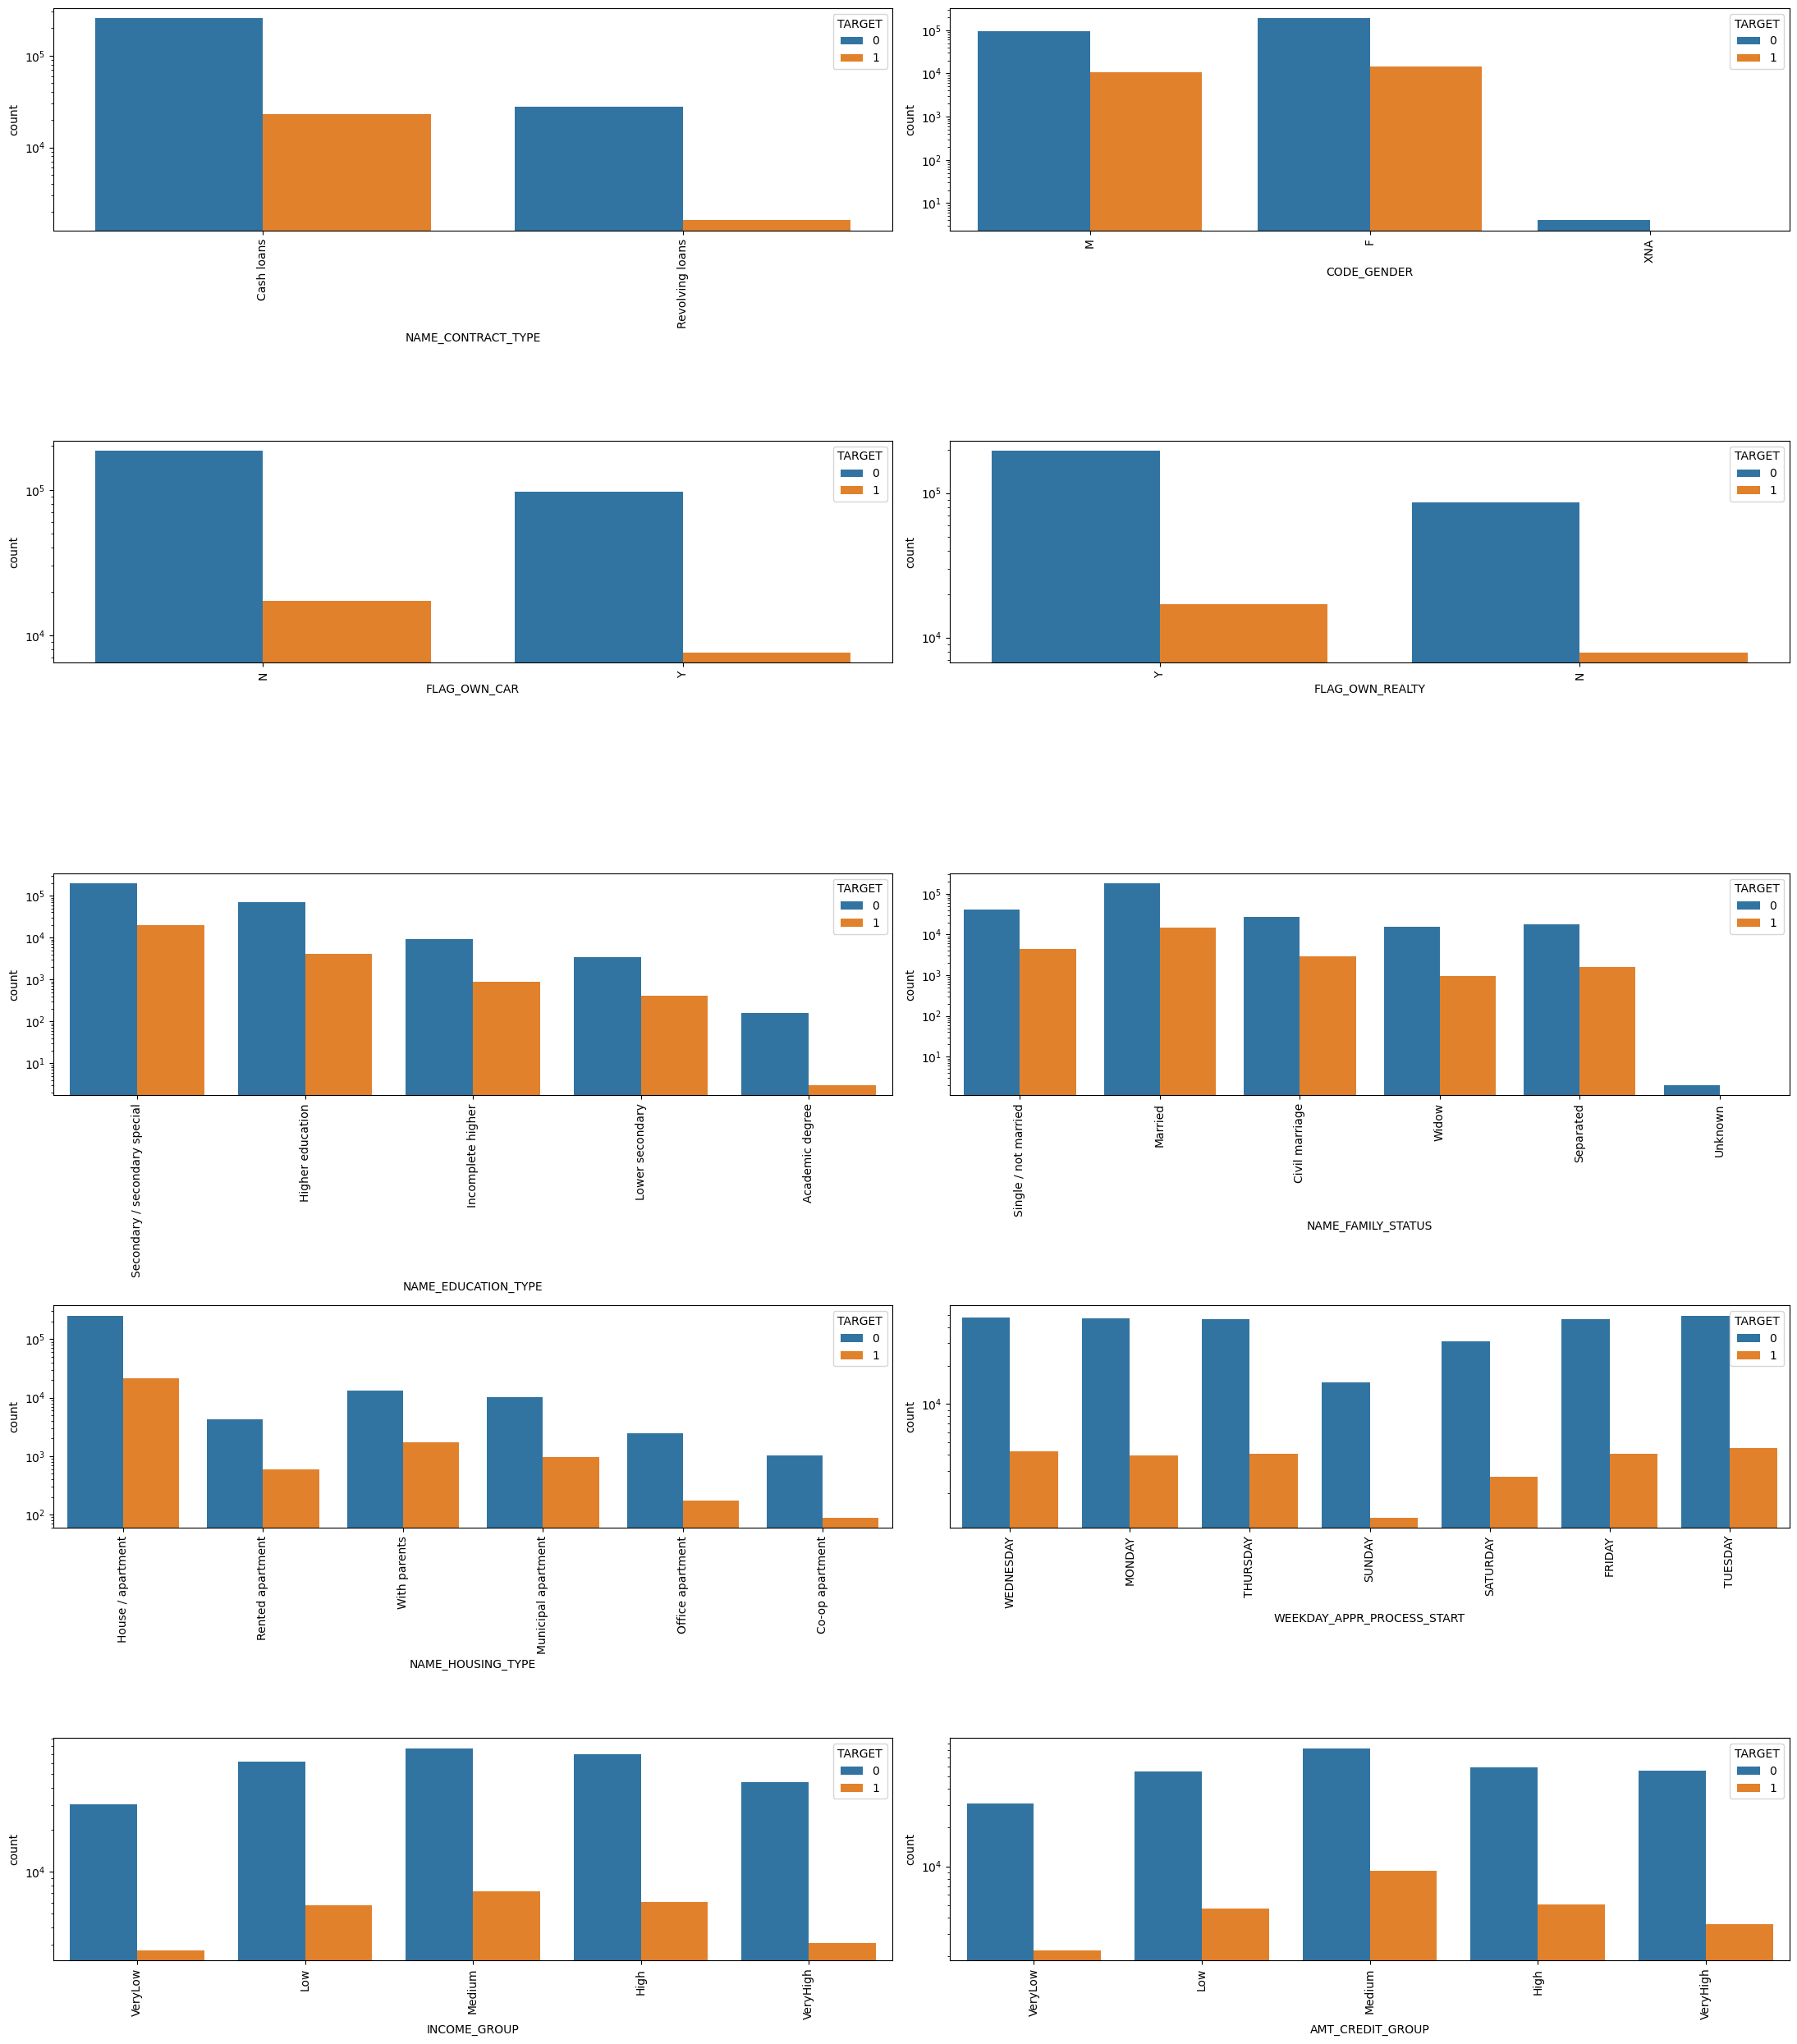

In [54]:
#Taking 10 categorical columns
categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                       'WEEKDAY_APPR_PROCESS_START', 'INCOME_GROUP', 'AMT_CREDIT_GROUP']

plt.figure(figsize=(22, 25))
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns) // 2 + len(categorical_columns) % 2, 2, i + 1)
    sns.countplot(x=col, hue='TARGET', data=App2)
    plt.yscale('log')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Observations

- Individuals with medium total income have a higher likelihood of defaulting.

- Those with a high credit amount are less prone to default.

- Applicants who begin the process on Sunday are less likely to default.

- Loan applications are fewer on Saturdays and Sundays, making these days less busy for the bank.

- People who own a house or apartment are more inclined to take out loans.

- Married individuals tend to take out more loans compared to other groups.

- It appears that people with secondary or special education are applying for loans in greater numbers.

- Individuals with real estate are more likely to take out loans.

- Those who do not own a car are more inclined to take out loans.

- Females are more likely to take out loans.

- Cash loans are more popular, while the default rate for revolving loans is lower.

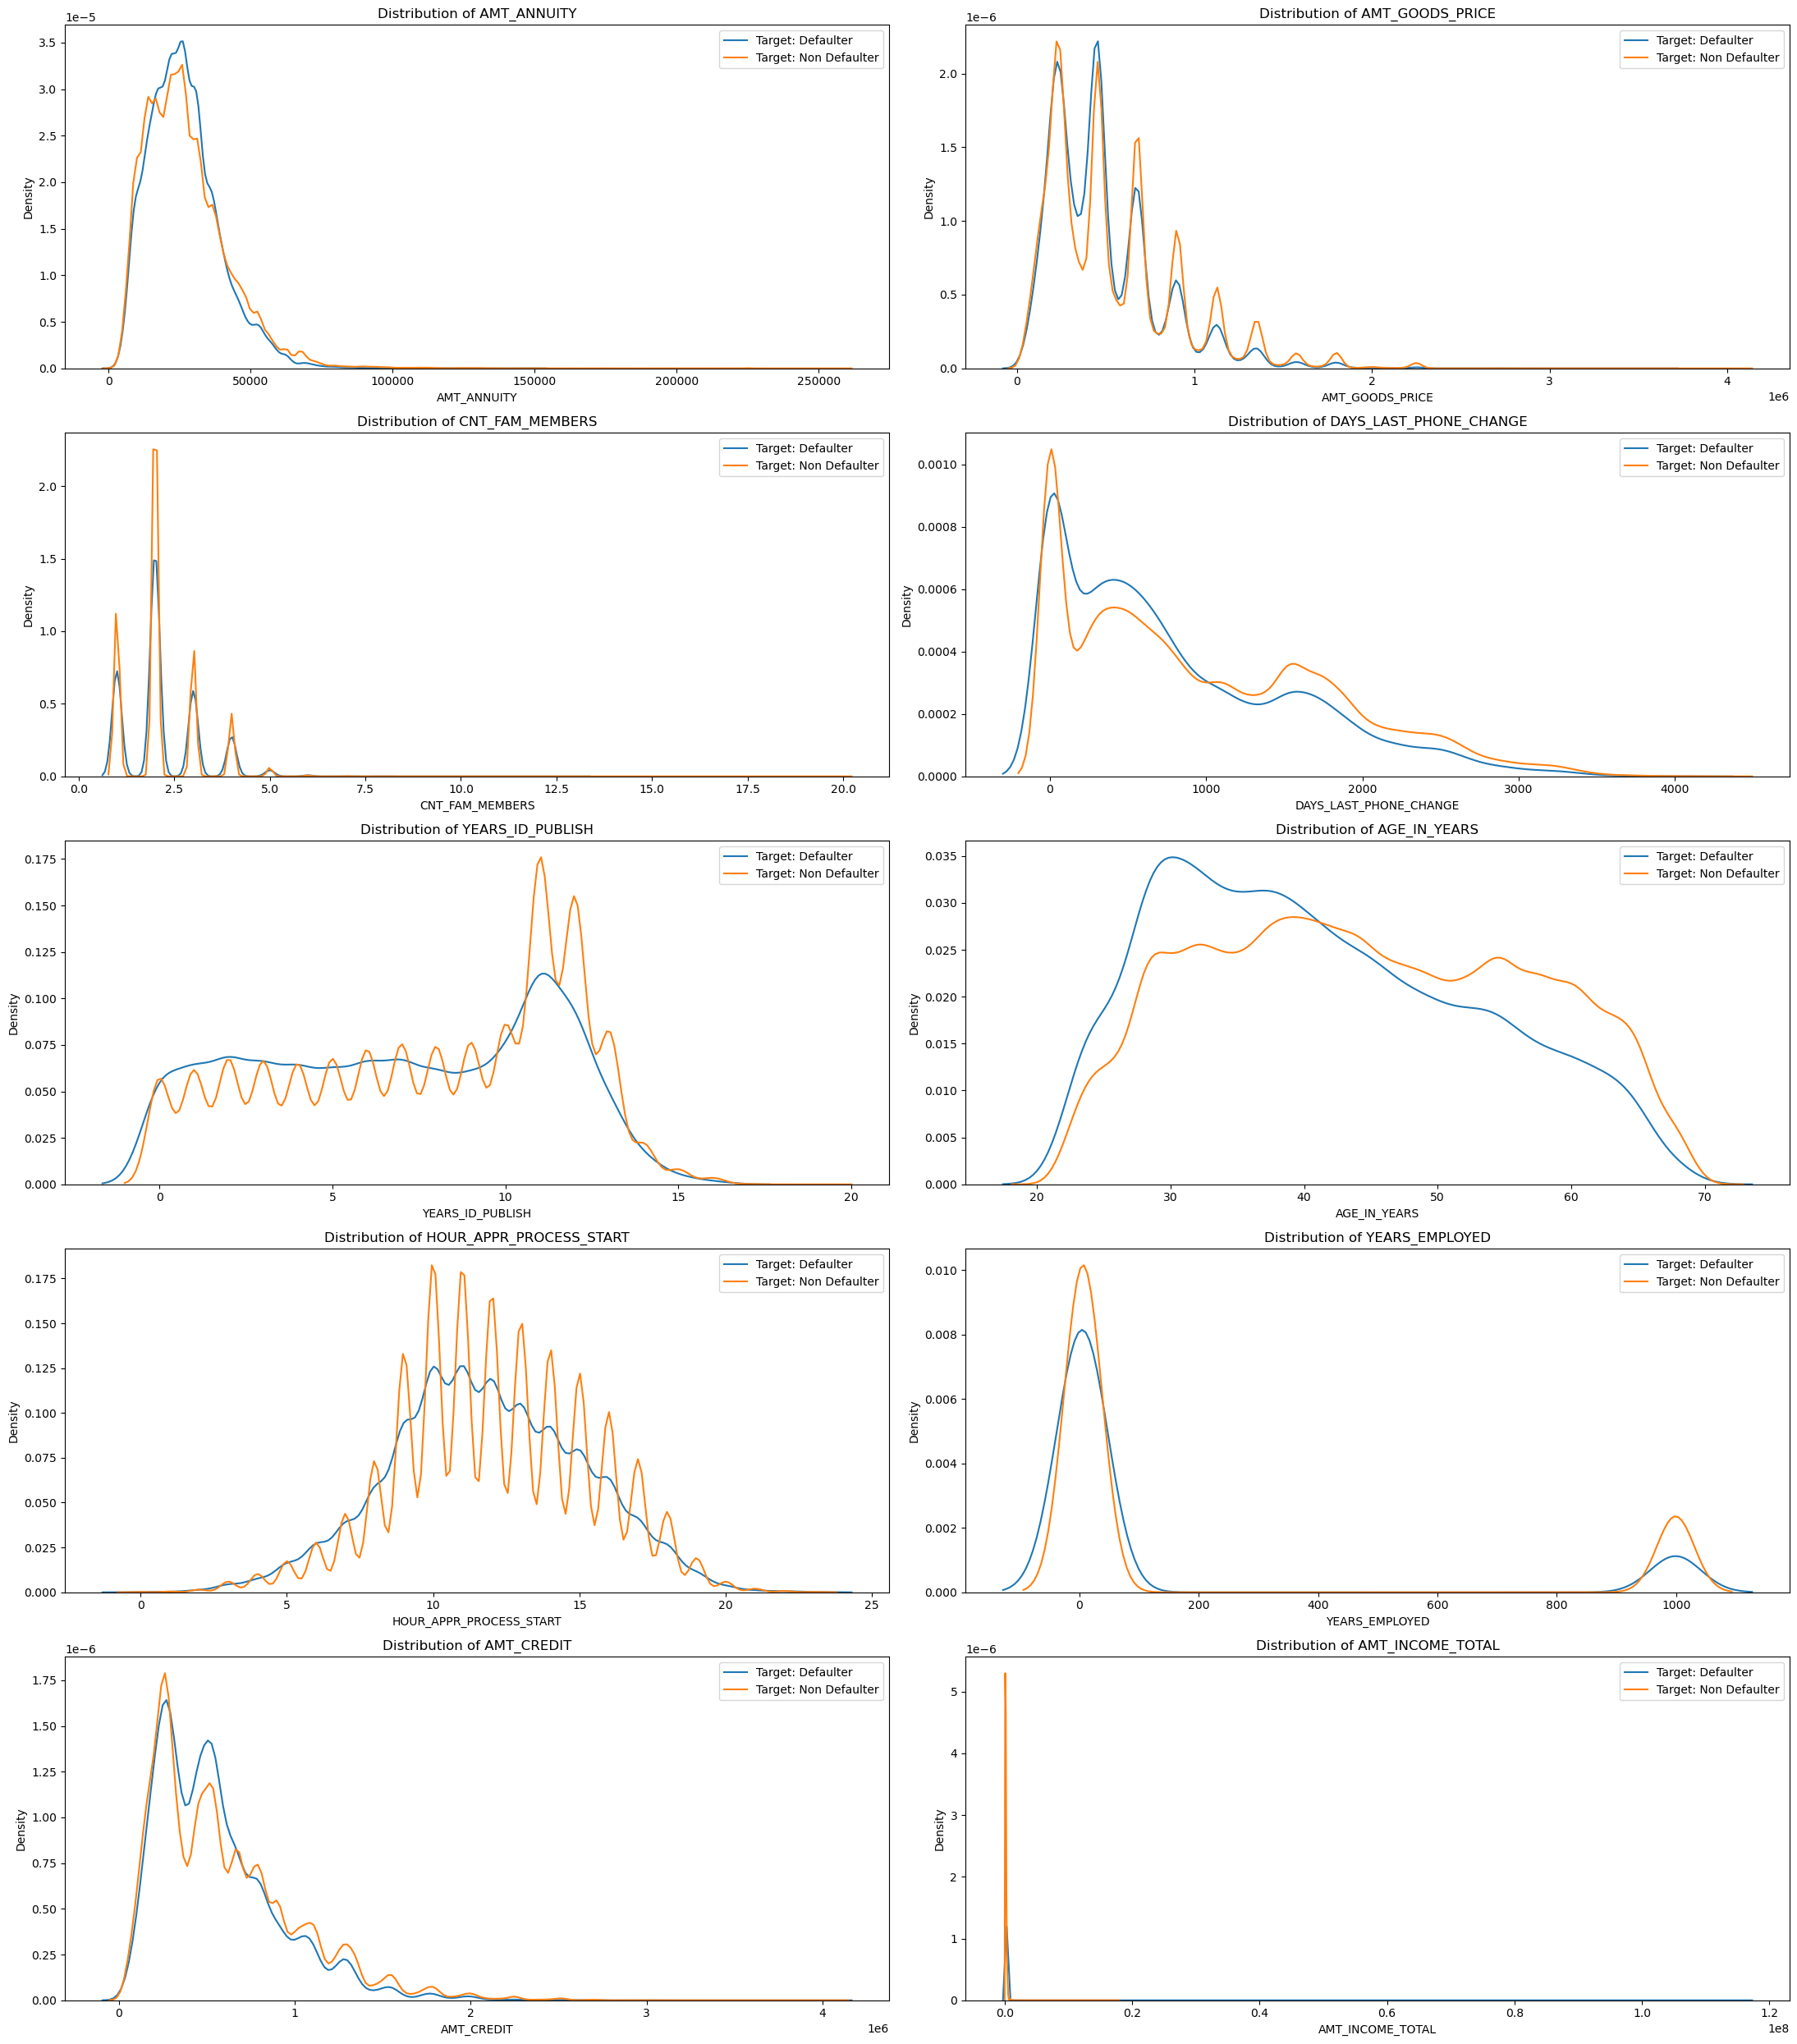

In [55]:
#Taking numerical columns
numerical_columns = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS',
                     'DAYS_LAST_PHONE_CHANGE', 'YEARS_ID_PUBLISH', 'AGE_IN_YEARS', 
                     'HOUR_APPR_PROCESS_START', 'YEARS_EMPLOYED', 'AMT_CREDIT', 'AMT_INCOME_TOTAL']

plt.figure(figsize=(22, 25))

for i, col in enumerate(numerical_columns): 
    plt.subplot(len(numerical_columns) // 2 + len(numerical_columns) % 2, 2, i + 1) 
    sns.distplot(App_target1[col].dropna(), hist=False, label='Target: Defaulter') 
    sns.distplot(App_target0[col].dropna(), hist=False, label='Target: Non Defaulter') 
    plt.title(f'Distribution of {col}')
    plt.xlabel(col) 
    plt.legend()
plt.tight_layout()
plt.show()


### Observations
- Individuals with lower total income have a higher likelihood of defaulting.

- Recently employed individuals tend to take out more loans.

- Retired individuals are more likely to take out loans.

- A significant number of loan applications are submitted between 10 AM and 2 PM.

- People aged between 27 years (10,000 days) and 41 years (15,000 days) are more inclined to take out loans.

- Individuals whose IDs were published between 10.9 years (4,000 days) and 13.6 years (5,000 days) ago tend to take out more loans.

- Nuclear families are more likely to take out loans.

- Loans are often taken out for lower amounts of goods.

- A higher number of loans are associated with lower annuity amounts.

## CORRELATION (Multivariate Analysis)

                             Var1                        Var2  Correlation
1342     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
542                FLAG_EMP_PHONE              YEARS_EMPLOYED         1.00
250               AMT_GOODS_PRICE                  AMT_CREDIT         0.98
839   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.96
740               CNT_FAM_MEMBERS                CNT_CHILDREN         0.89
1384     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.87
1007  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.85
1133      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78
251               AMT_GOODS_PRICE                 AMT_ANNUITY         0.75
209                   AMT_ANNUITY                  AMT_CREDIT         0.75


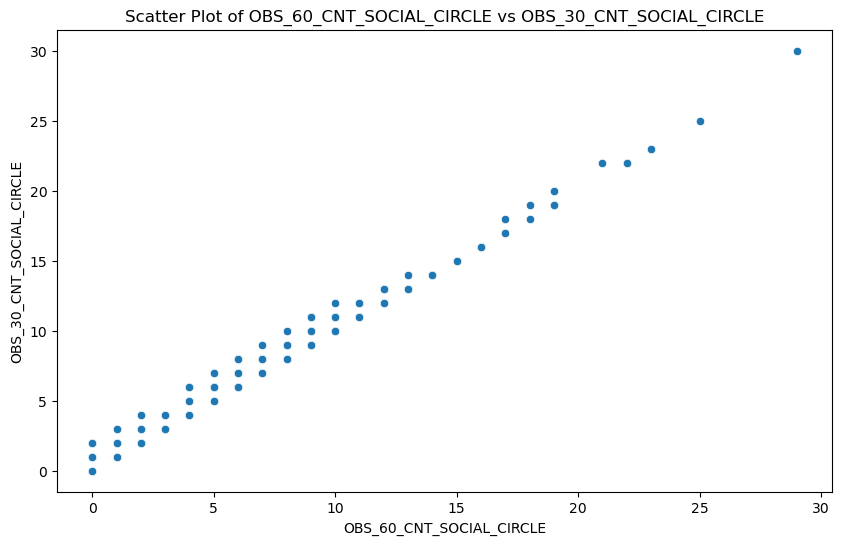

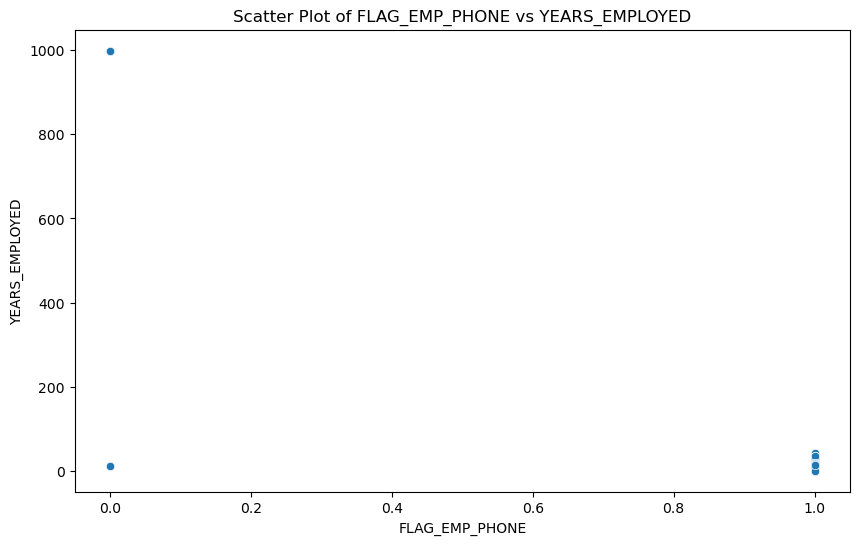

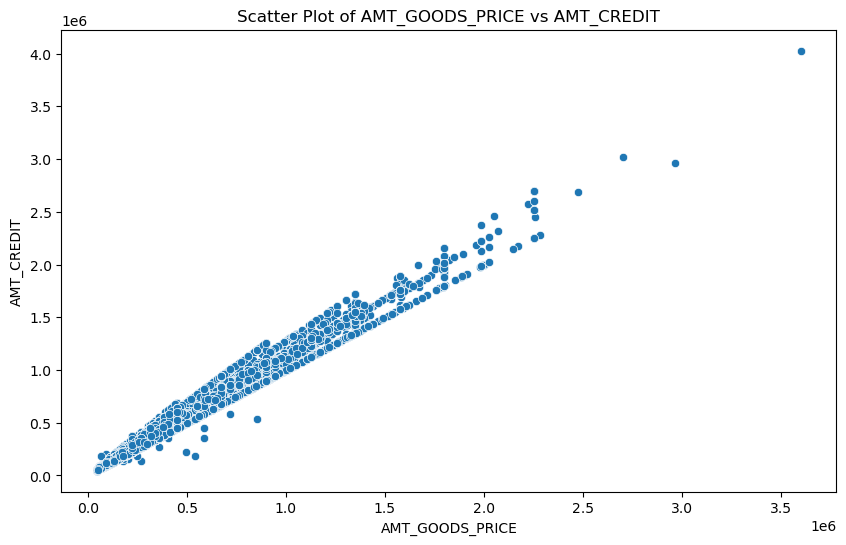

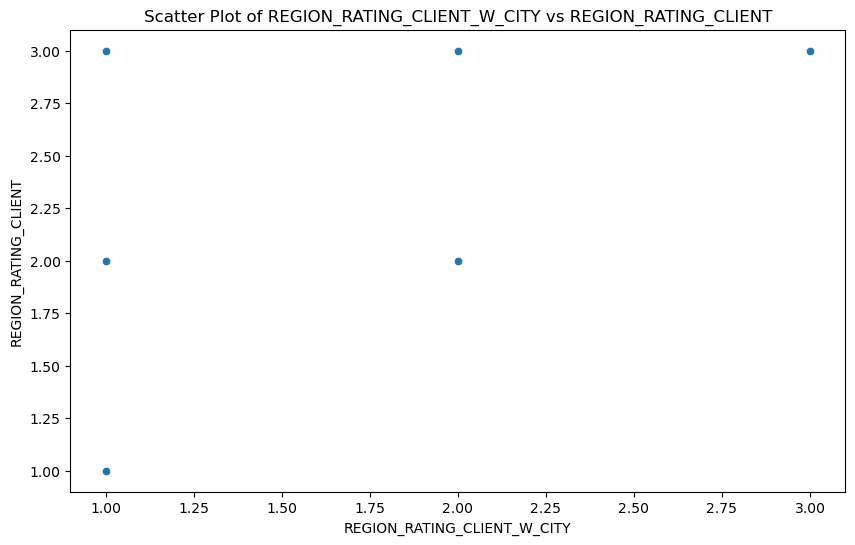

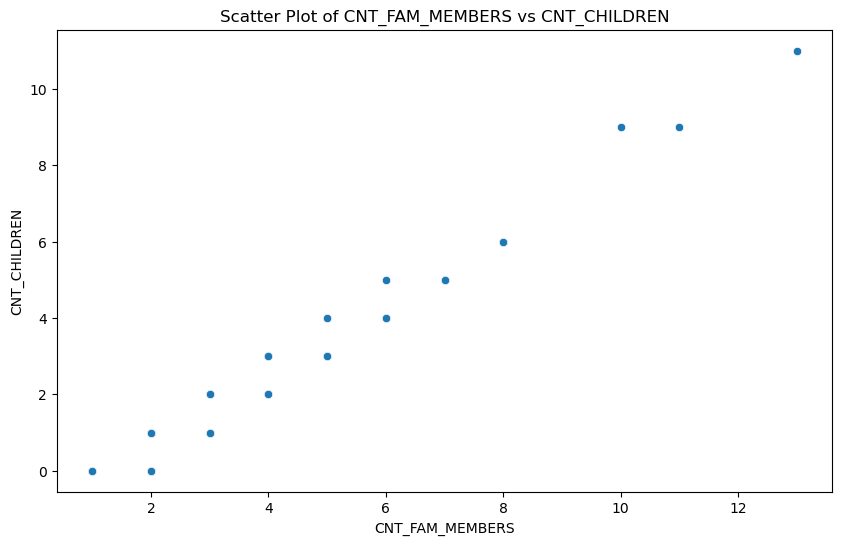

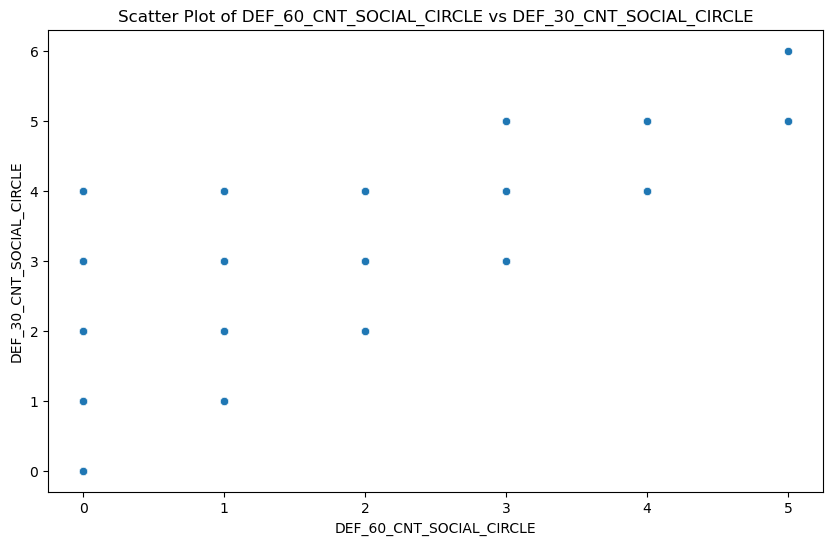

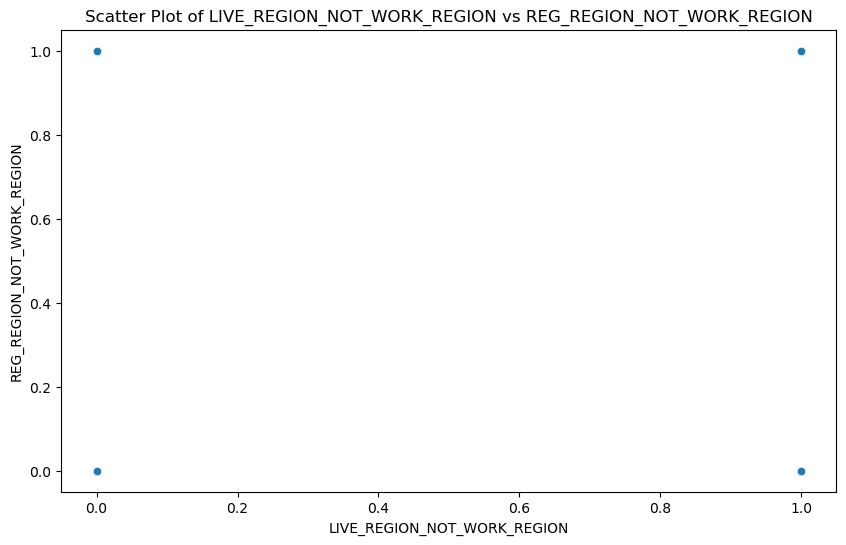

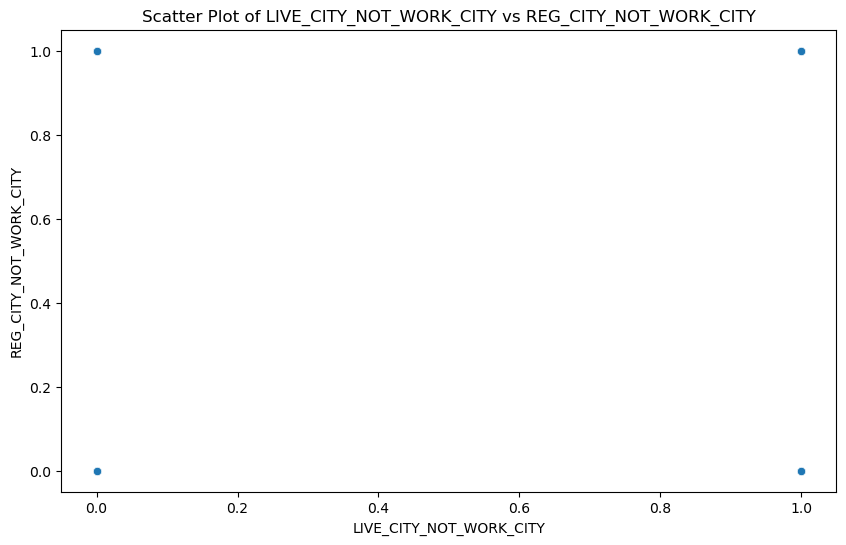

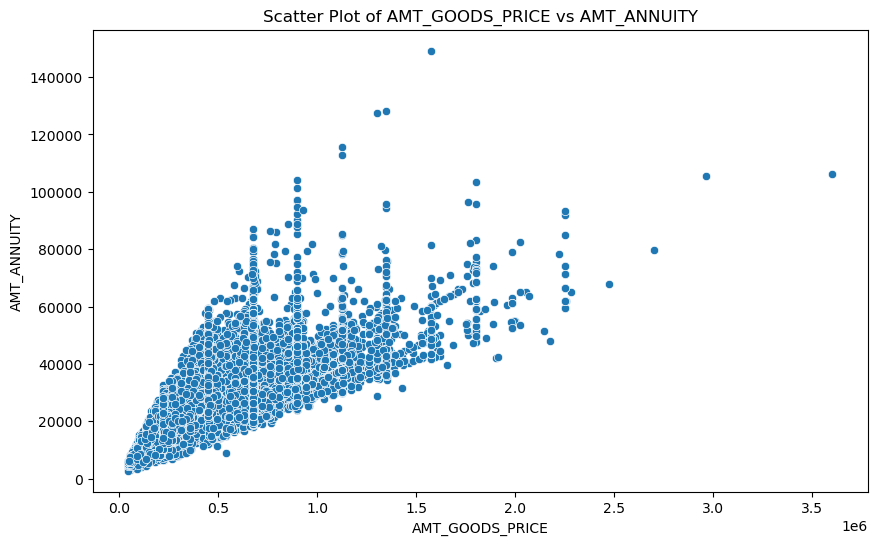

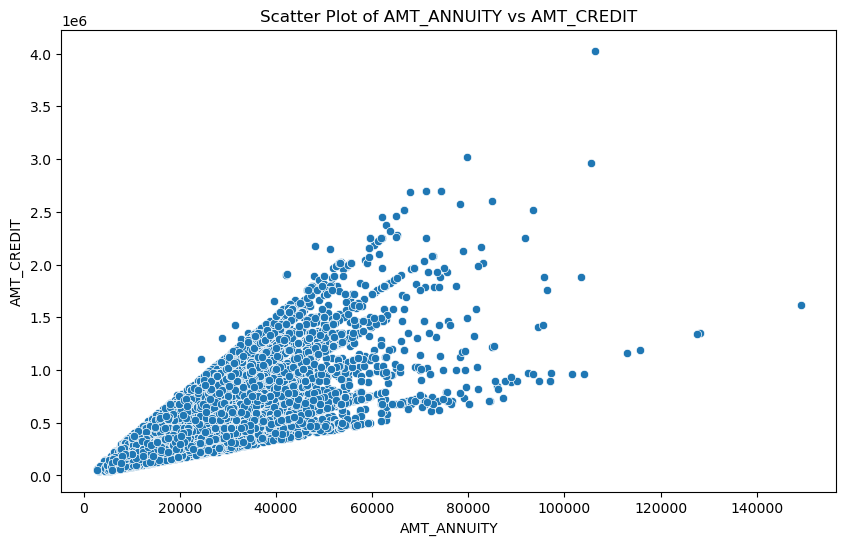

In [56]:


# Select only numeric columns
numeric_columns = App_target1.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Use np.triu to get the upper triangle of the correlation matrix
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Unstack the correlation matrix and reset the index
corrdf = corrdf.unstack().reset_index()

# Rename the columns for better readability
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Drop rows with NaN values in the 'Correlation' column
corrdf.dropna(subset=['Correlation'], inplace=True)

# Round the correlation values to 2 decimal places
corrdf['Correlation'] = round(corrdf['Correlation'], 2)

# Convert negative correlation values to positive
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort the values by correlation in descending order and get the top 10
top_10_corr = corrdf.sort_values(by='Correlation', ascending=False).head(10)

# Display the top 10 correlated values
print(top_10_corr)

# Create individual scatter plots for the top 10 correlated pairs
for i, row in top_10_corr.iterrows():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=App_target1[row['Var1']], y=App_target1[row['Var2']])
    plt.title(f'Scatter Plot of {row["Var1"]} vs {row["Var2"]}')
    plt.xlabel(row['Var1'])
    plt.ylabel(row['Var2'])
    plt.show()


- OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE: These metrics represent the client's social environment with observable 30/60 days past due (DPD). They are definitely correlated, and the correlation is higher and steeper for Target 1, indicating that this parameter should be closely monitored during the approval process.

- DEF_30_CNT_SOCIAL_CIRCLE: The trend is increasing, but Target 1 has less data, resulting in a less dense graph.

- AMT_CREDIT and AMT_GOODS_PRICE: These amounts do not seem to be increasing proportionately with AMT_INCOME for Target 1, which could potentially lead to defaults.

                             Var1                        Var2  Correlation
1342     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
542                FLAG_EMP_PHONE              YEARS_EMPLOYED         1.00
250               AMT_GOODS_PRICE                  AMT_CREDIT         0.99
839   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95
740               CNT_FAM_MEMBERS                CNT_CHILDREN         0.88
1007  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.86
1384     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.86
1133      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83
251               AMT_GOODS_PRICE                 AMT_ANNUITY         0.78
209                   AMT_ANNUITY                  AMT_CREDIT         0.77


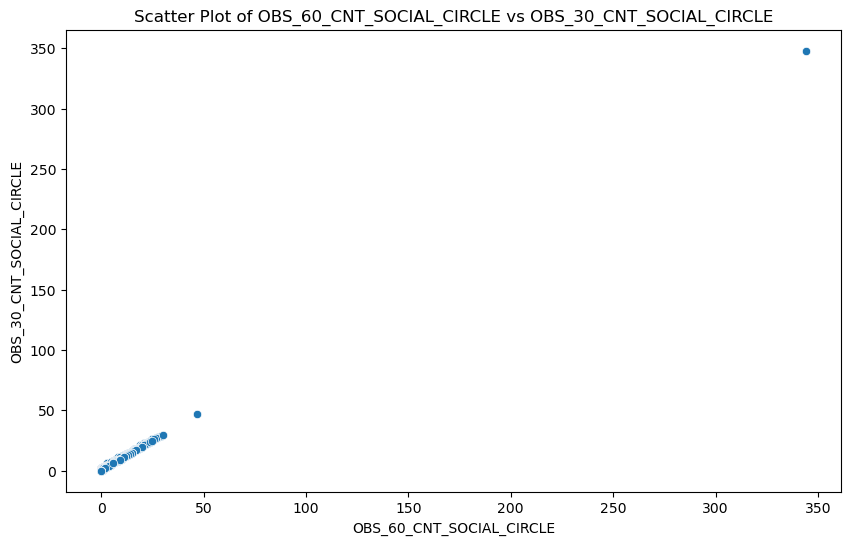

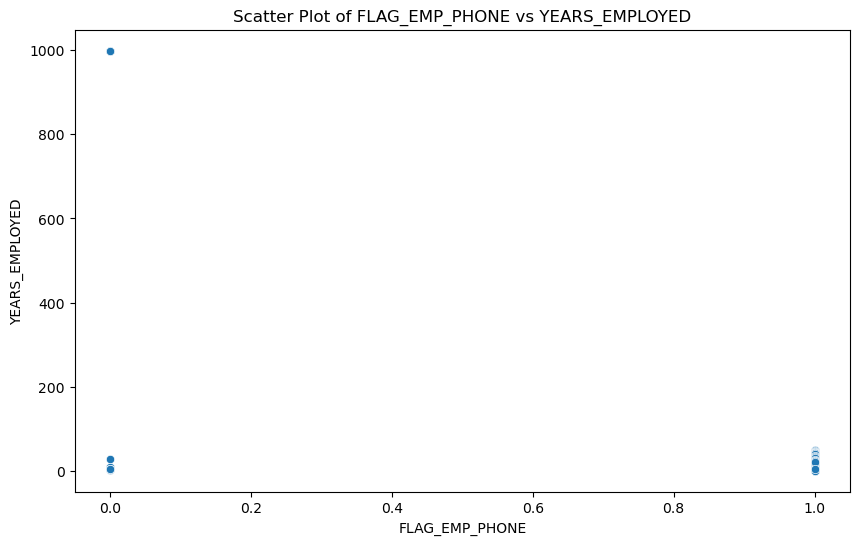

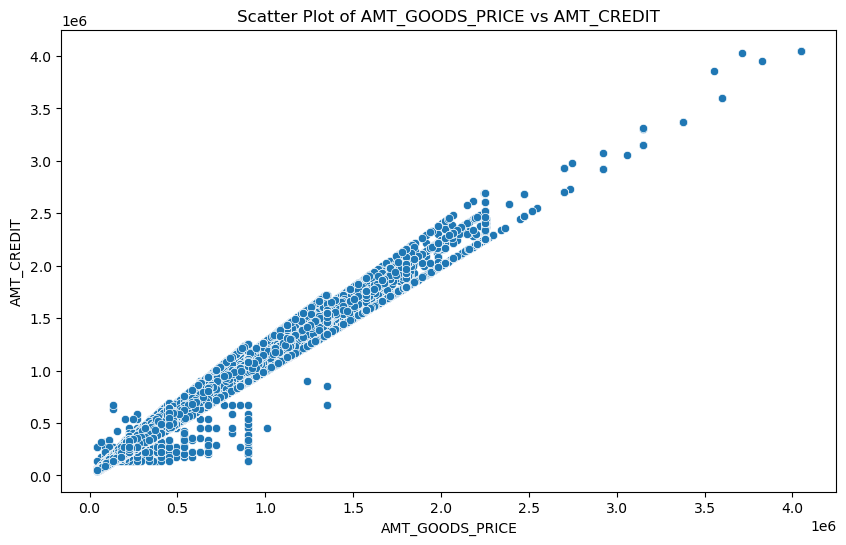

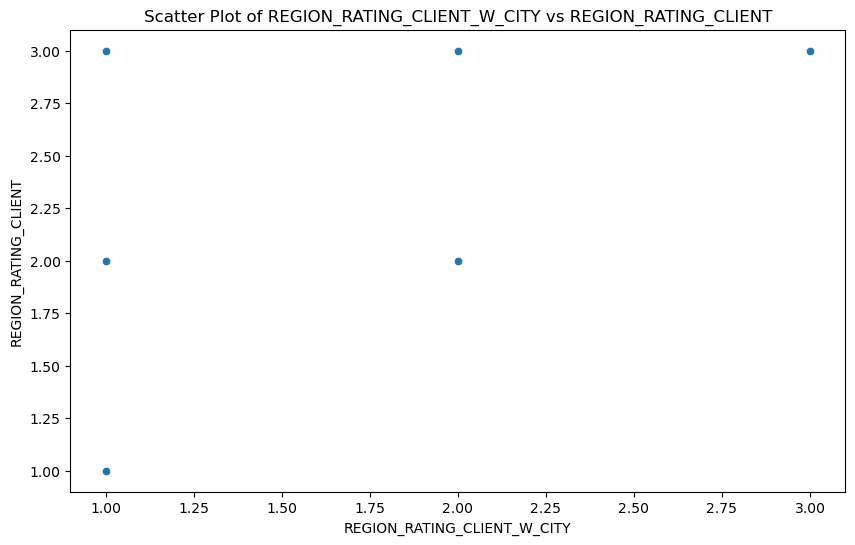

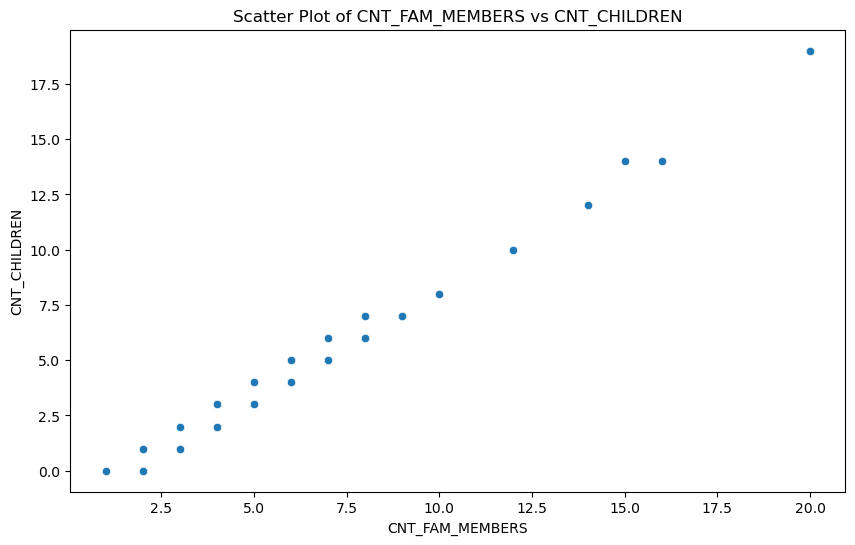

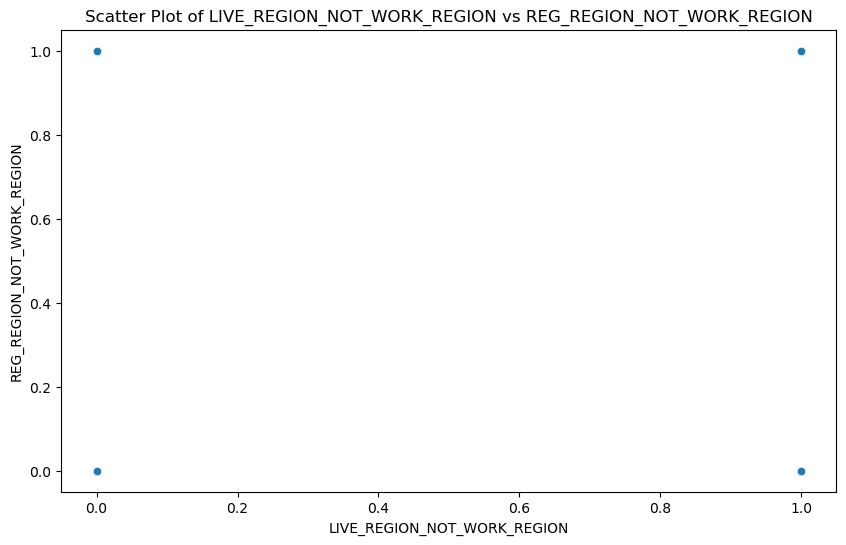

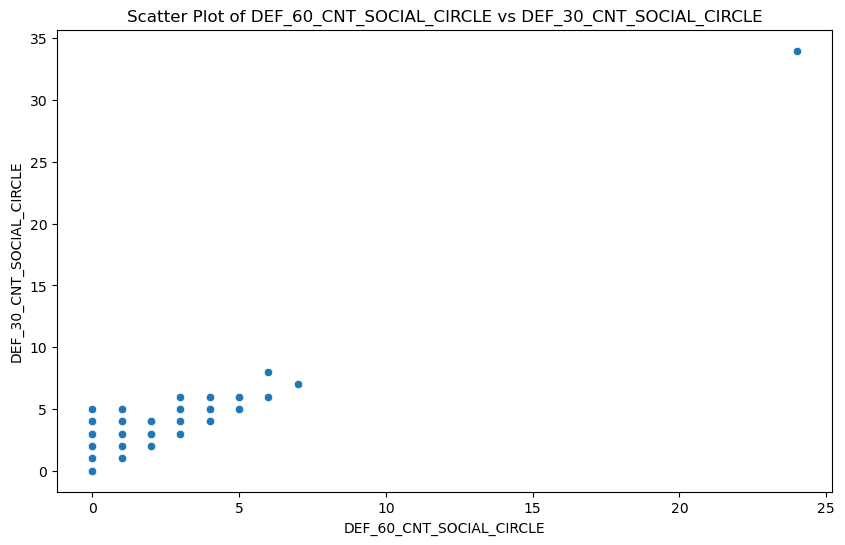

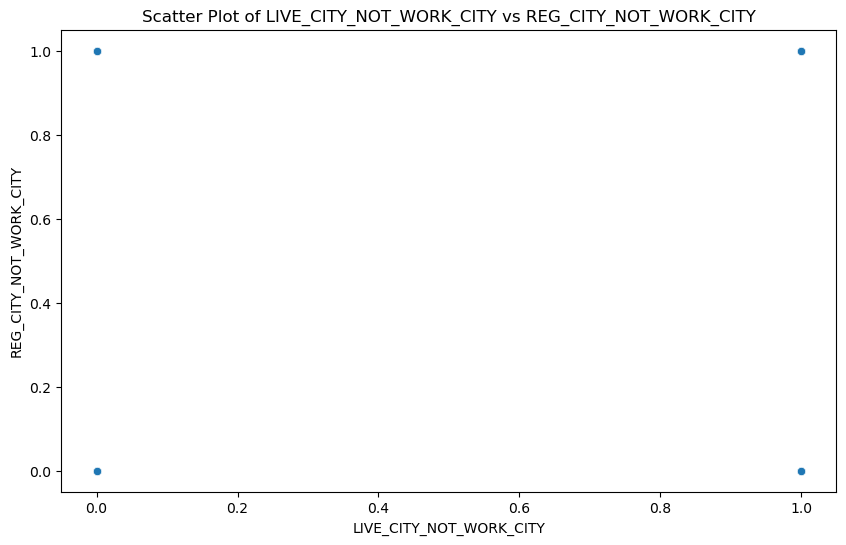

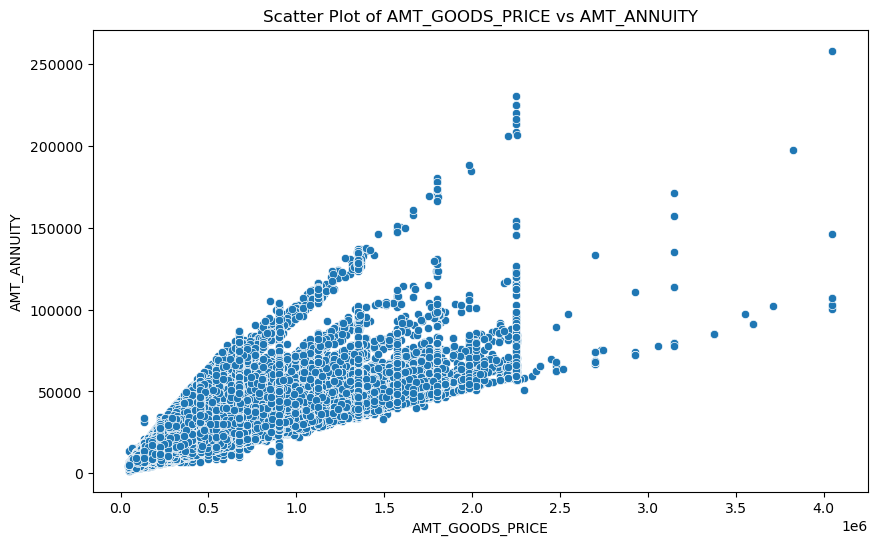

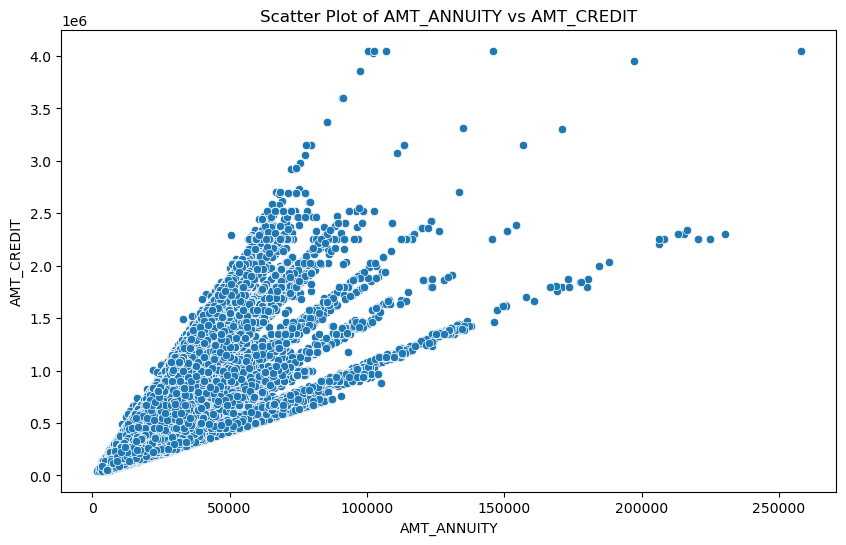

In [57]:
# Select only numeric columns
numeric_columns = App_target0.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Use np.triu to get the upper triangle of the correlation matrix
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Unstack the correlation matrix and reset the index
corrdf = corrdf.unstack().reset_index()

# Rename the columns for better readability
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Drop rows with NaN values in the 'Correlation' column
corrdf.dropna(subset=['Correlation'], inplace=True)

# Round the correlation values to 2 decimal places
corrdf['Correlation'] = round(corrdf['Correlation'], 2)

# Convert negative correlation values to positive
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort the values by correlation in descending order and get the top 10
top_10_corr = corrdf.sort_values(by='Correlation', ascending=False).head(10)

# Display the top 10 correlated values
print(top_10_corr)

# Create individual scatter plots for the top 10 correlated pairs
for i, row in top_10_corr.iterrows():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=App_target0[row['Var1']], y=App_target0[row['Var2']])
    plt.title(f'Scatter Plot of {row["Var1"]} vs {row["Var2"]}')
    plt.xlabel(row['Var1'])
    plt.ylabel(row['Var2'])
    plt.show()

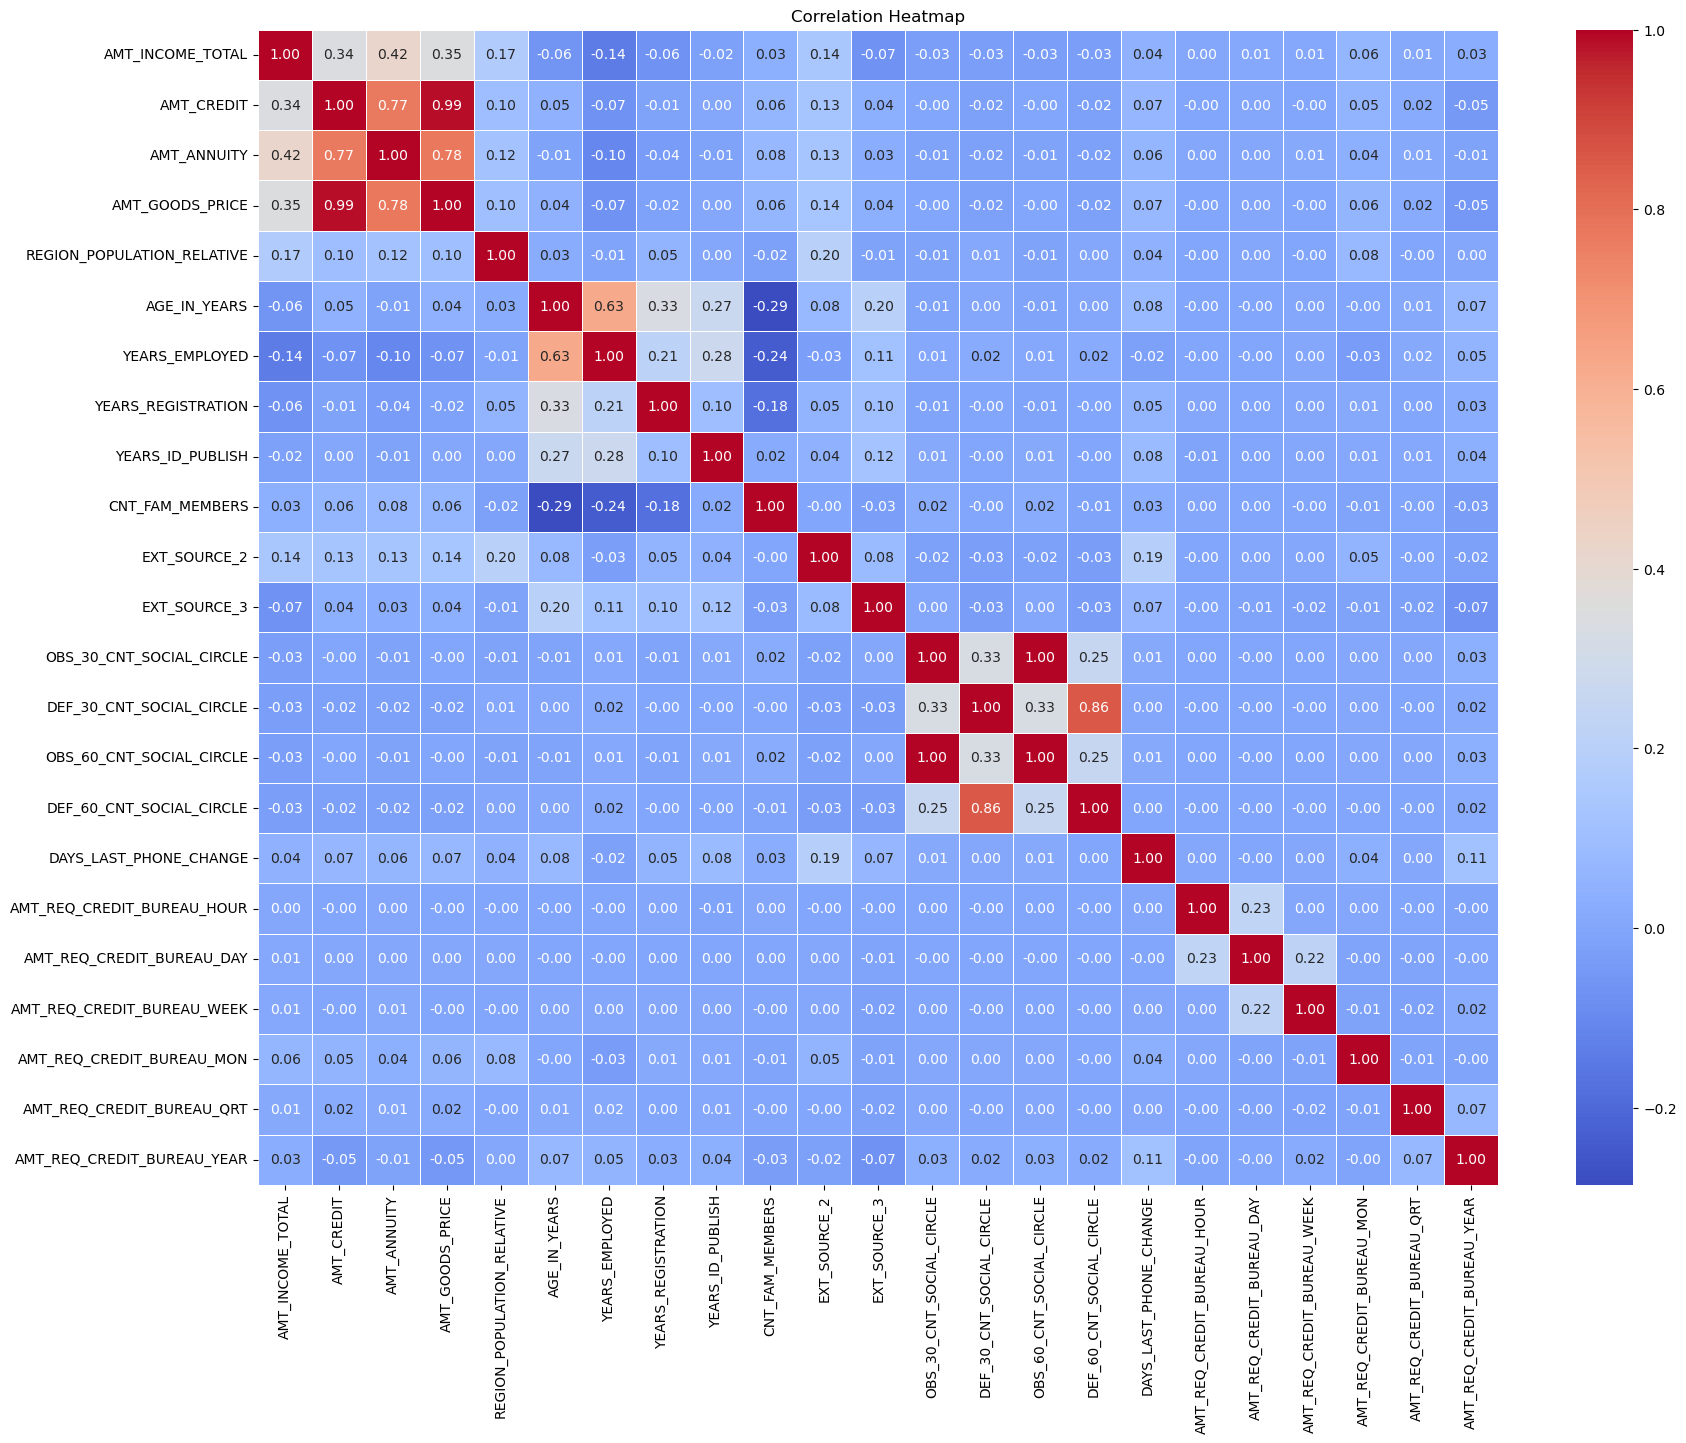

In [90]:

# Select only numeric columns
numeric_columns = App_target0.select_dtypes(include=['float64'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1200x1000 with 0 Axes>

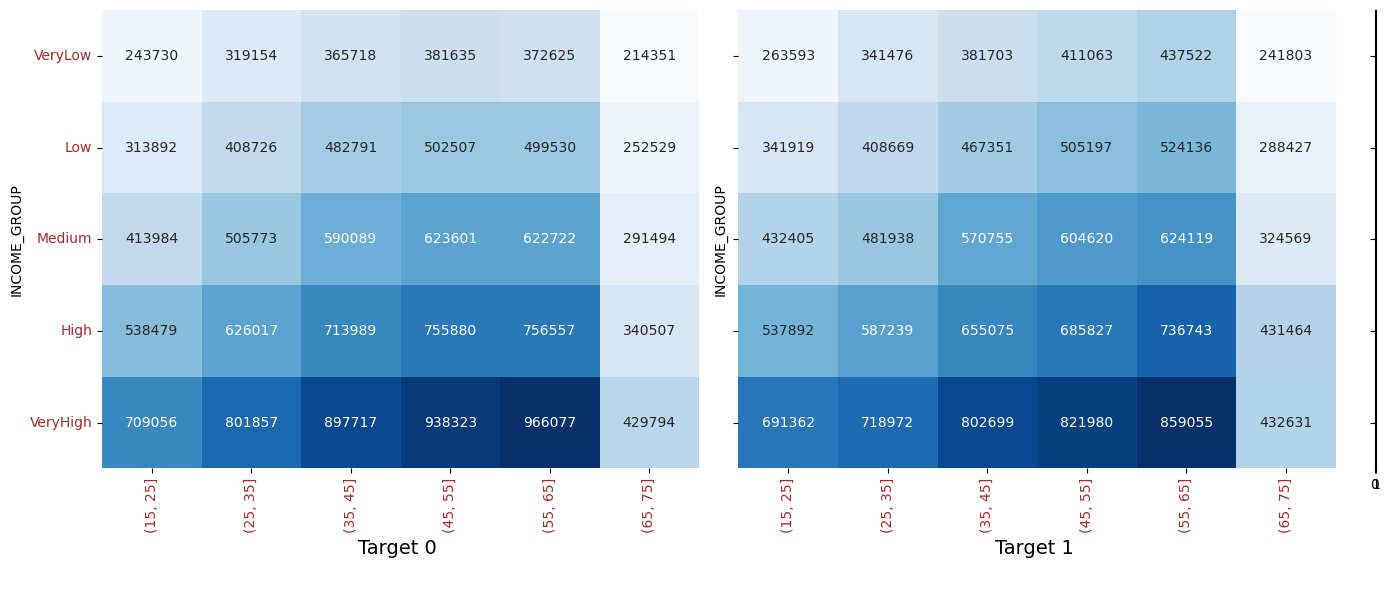

In [59]:

#Analysing relationship of AMT_CREDIT with AGE GROUP and income group
plt.figure(figsize=[12,10])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))

res=pd.pivot_table(data=App_target0, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")

c=sns.heatmap(res, annot=True,cmap='Blues', fmt="g", ax=ax1, cbar=False)
c.set_xlabel('Target 0 \n', fontsize=14,fontweight= 7)
c.set_xticklabels(c.get_xticklabels(), rotation = 90, fontsize = 10, color="Brown")

res1=pd.pivot_table(data=App_target1, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")

c1=sns.heatmap(res1, annot=True,cmap='Blues', fmt="g", ax=ax2, cbar=False)

c1.set_xlabel('Target 1 \n', fontsize=14,fontweight= 7,)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90, fontsize = 10, color="Brown")

c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 10, color="Brown")

plt.tight_layout()
plt.show()

Age Group 55-65 in Very High income group has high amount credit. As explained above, this could result as loss in loan book

## Bivariate Analysis

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       255011            27675
1                        23221             1604


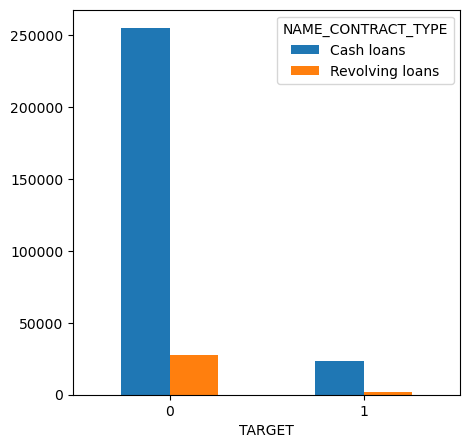

In [60]:
#Bi-variate categorical plots

plot1= pd.crosstab(index=App2['TARGET'],columns=App2['NAME_CONTRACT_TYPE'])
print(plot1)
plot1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

- Cash loans are the highest.

CODE_GENDER       F      M  XNA
TARGET                         
0            188278  94404    4
1             14170  10655    0


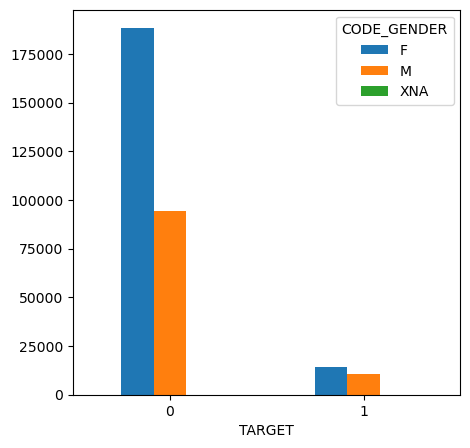

In [55]:
plot2= pd.crosstab(index=App2['TARGET'],columns=App2['CODE_GENDER'])
print(plot2)
plot2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

- Females take more loans than males.

NAME_TYPE_SUITE  Children  Family  Group of people  Other_A  Other_B  \
TARGET                                                                 
0                    3026   37140              248      790     1596   
1                     241    3009               23       76      174   

NAME_TYPE_SUITE  Spouse, partner  Unaccompanied  
TARGET                                           
0                          10475         228189  
1                            895          20337  


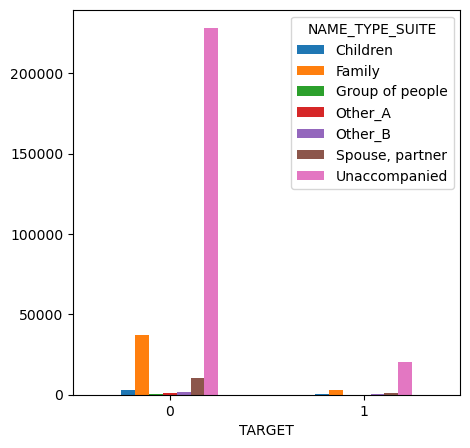

In [60]:
plot3= pd.crosstab(index=App2['TARGET'],columns=App2['NAME_TYPE_SUITE'])
print(plot3)
plot3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

-  Most of the people come alone when taking a loan

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                          10                 66257                3   
1                           0                  5360                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  
TARGET                                                                    
0                     52380          20454       18          14   143550  
1                      2982           1249        0           8    15224  


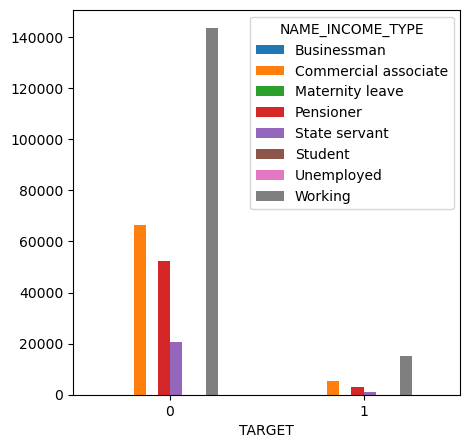

In [62]:
plot4= pd.crosstab(index=App2['TARGET'],columns=App2['NAME_INCOME_TYPE'])
print(plot4)
plot4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()


- working people take more loans

NAME_HOUSING_TYPE  Co-op apartment  House / apartment  Municipal apartment  \
TARGET                                                                       
0                             1033             251596                10228   
1                               89              21272                  955   

NAME_HOUSING_TYPE  Office apartment  Rented apartment  With parents  
TARGET                                                               
0                              2445              4280         13104  
1                               172               601          1736  


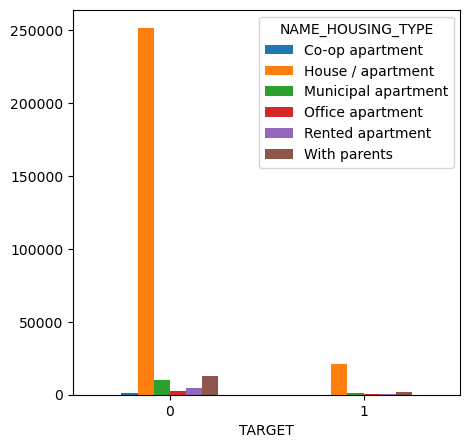

In [64]:
plot5= pd.crosstab(index=App2['TARGET'],columns=App2['NAME_HOUSING_TYPE'])
print(plot5)
plot5.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

- People having house/appartment tend to take more loans

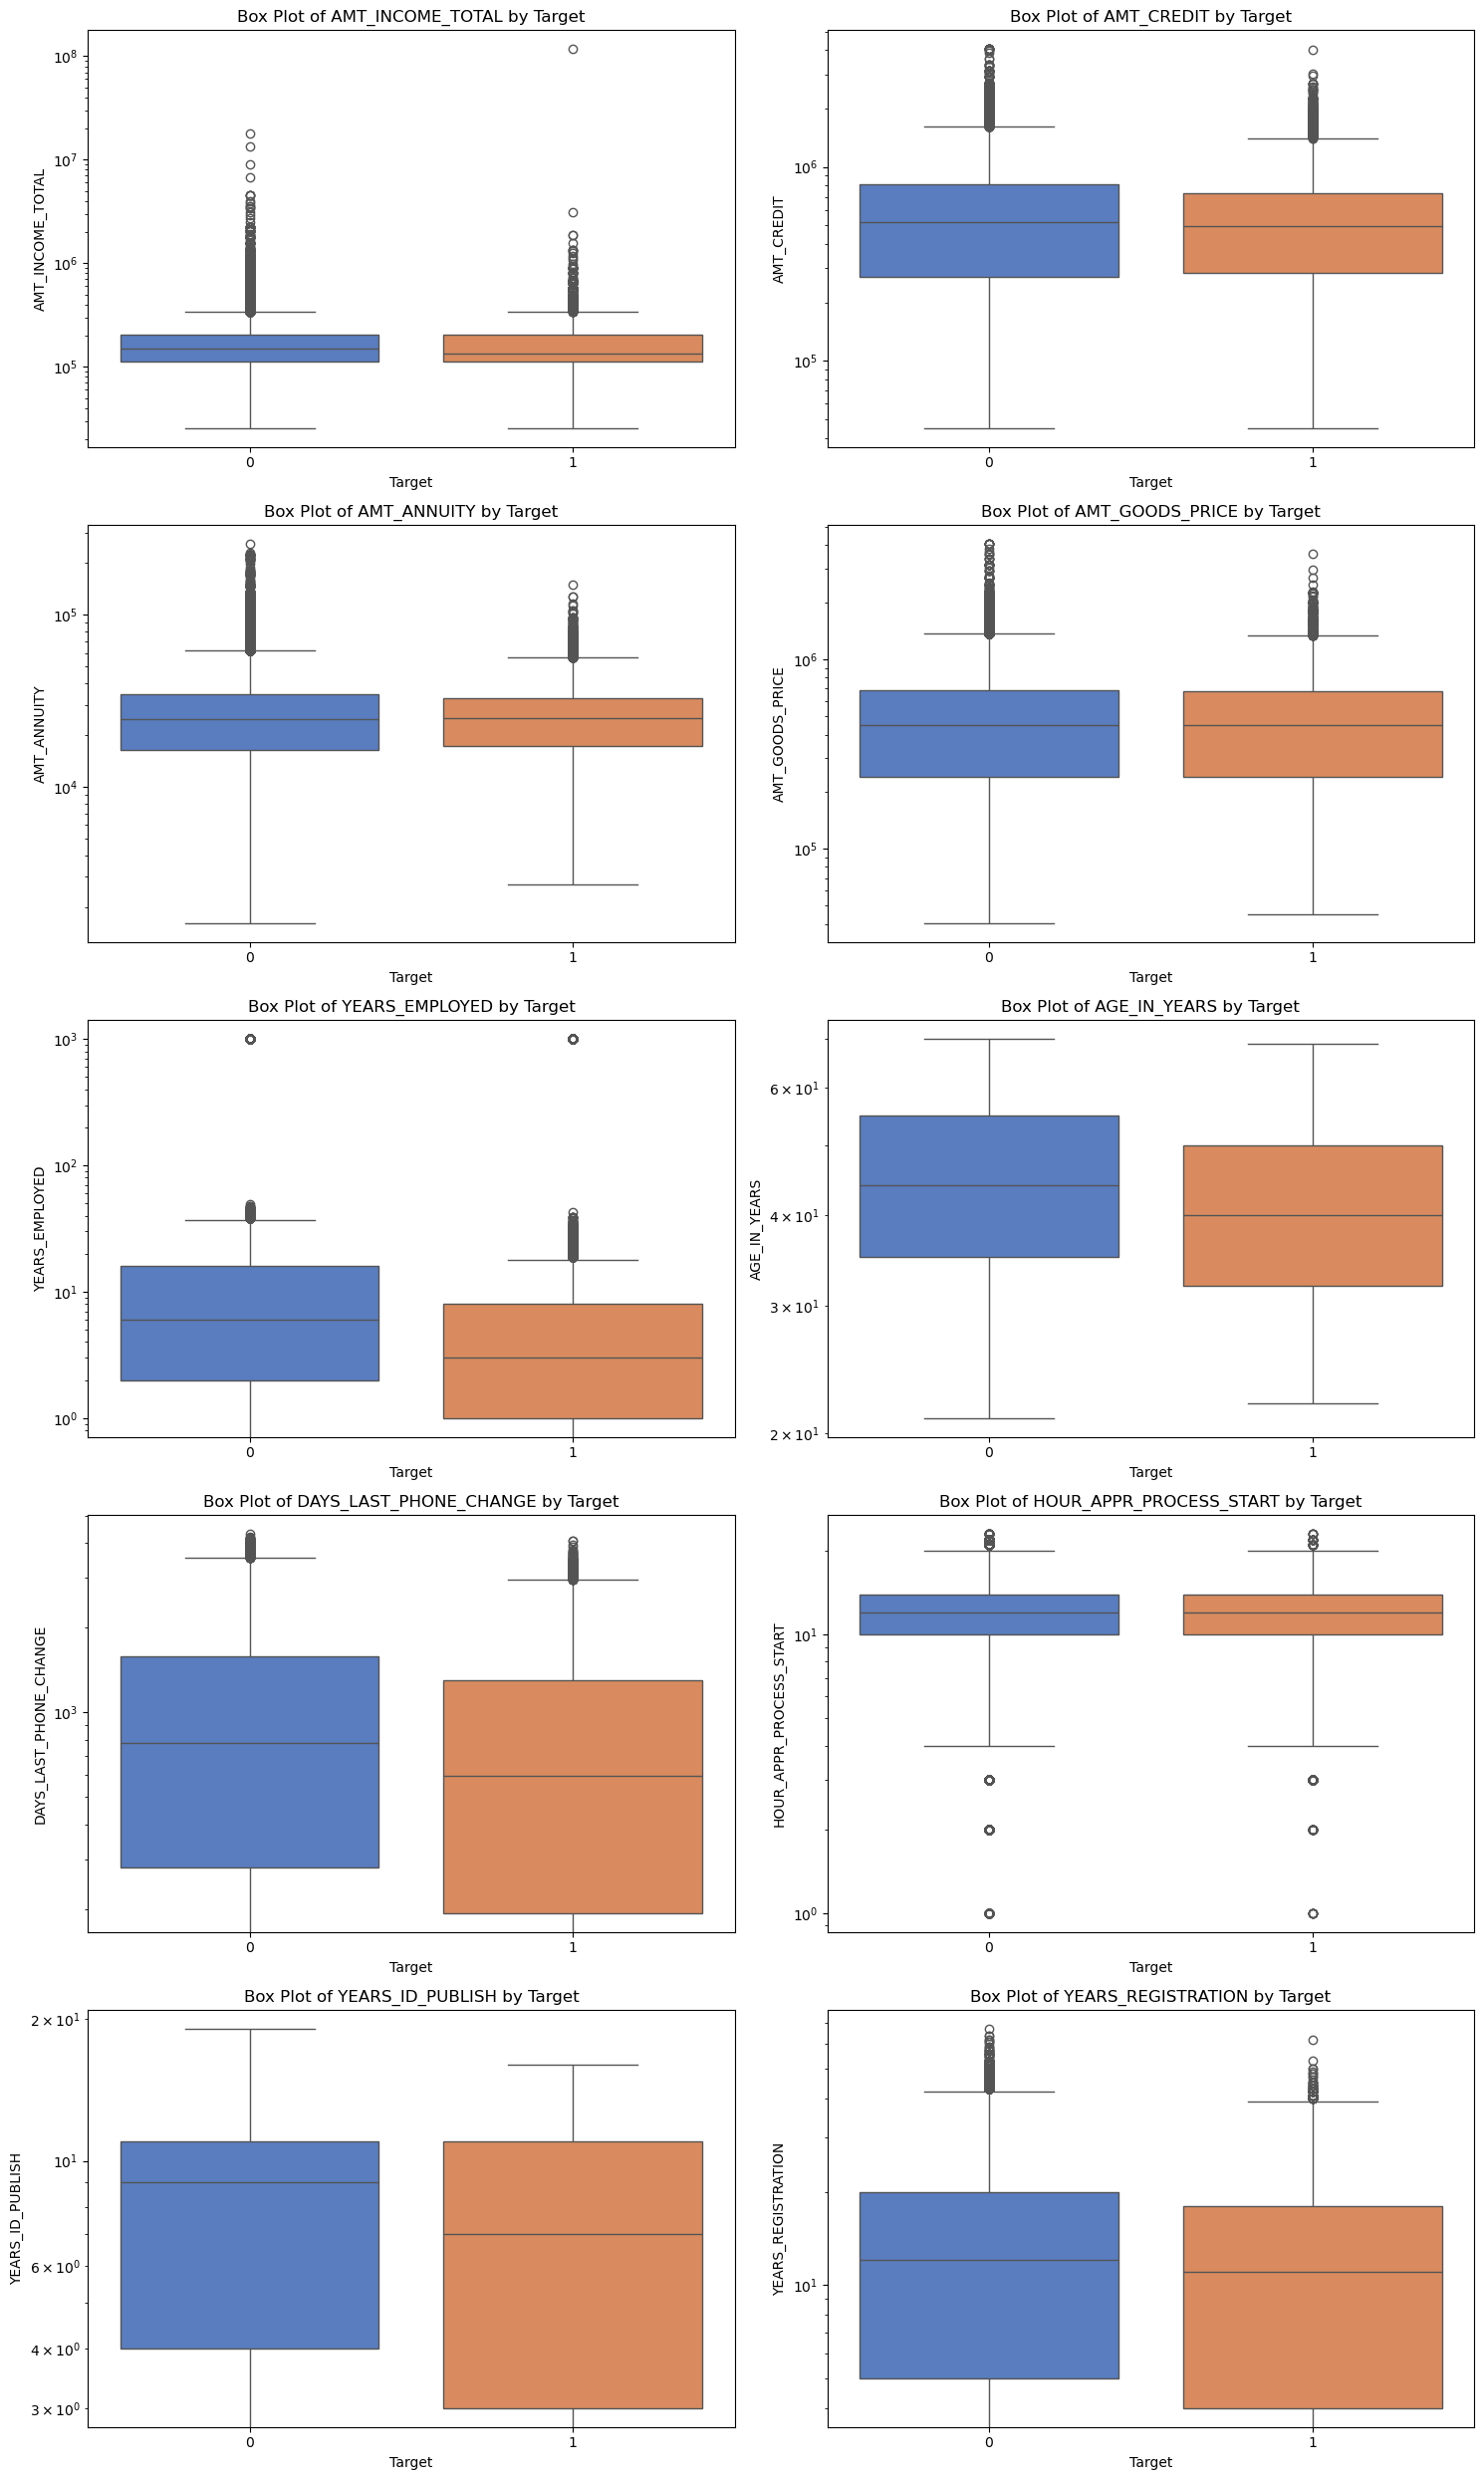

In [74]:
# Define the continuous columns
continuous_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                      'YEARS_EMPLOYED', 'AGE_IN_YEARS', 'DAYS_LAST_PHONE_CHANGE', 
                      'HOUR_APPR_PROCESS_START', 'YEARS_ID_PUBLISH', 'YEARS_REGISTRATION']

plt.figure(figsize=(15, 25))

for i, col in enumerate(continuous_columns):
    plt.subplot(len(continuous_columns) // 2 + len(continuous_columns) % 2, 2, i + 1)
    sns.boxplot(x='TARGET', y=col, data=App2, palette="muted")
    plt.yscale('log')
    plt.title(f'Box Plot of {col} by Target')
    plt.xlabel('Target')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Observations

- A higher number of clients update their registration details after 4000 days from loan approval.

- For some non-default clients, the time taken to publish IDs is longer compared to default clients.

- The application process start hours are similar for both default and non-default cases.

- In non-default cases, individuals retain their phone numbers for a longer period.

- People with a higher number of days since birth are less likely to default.

- In non-default cases, the AMT_GOODS_PRICE variable shows more outliers compared to default cases.

- In default cases, most clients have an amount annuity greater than 25000 (median value).

- Clients with a credit amount greater than 50000 are less likely to default compared to those with lower credit amounts.

- Individuals with a higher number of employment days are less likely to default.

- The majority of defaulting clients have lower total income.

# Previous Application Data

In [62]:
pre_App=pd.read_csv("previous_application.csv")
pre_App.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [63]:
pre_App.shape

(1670214, 37)

In [64]:
pre_App.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [65]:
pre_App.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [66]:
#Columns with more than 50% of missing values, its better to drop them
cols_to_drop= pre_App.columns[100*pre_App.isnull().mean()>50]
                                                       
print(cols_to_drop)
print(len(cols_to_drop))

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')
4


In [67]:
pre_App1 = pre_App.drop(cols_to_drop, axis=1)

In [68]:
pre_App1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [69]:
# converting -ve values to +ve
pre_App1['DAYS_DECISION']=pre_App1['DAYS_DECISION'].abs()
pre_App1['SELLERPLACE_AREA']=pre_App1['SELLERPLACE_AREA'].abs()
pre_App1['DAYS_FIRST_DUE']=pre_App1['DAYS_FIRST_DUE'].abs()
pre_App1['DAYS_LAST_DUE_1ST_VERSION']=pre_App1['DAYS_LAST_DUE_1ST_VERSION'].abs()
pre_App1['DAYS_LAST_DUE']=pre_App1['DAYS_LAST_DUE'].abs()
pre_App1['DAYS_TERMINATION']=pre_App1['DAYS_TERMINATION'].abs()
pre_App1['DAYS_FIRST_DRAWING']=pre_App1['DAYS_FIRST_DRAWING'].abs()

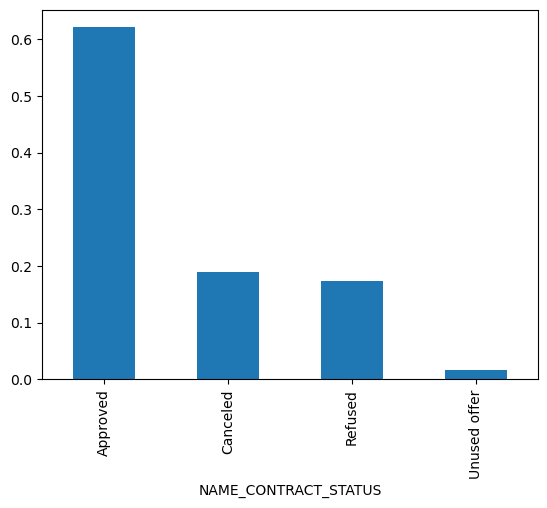

In [70]:
(pre_App1.NAME_CONTRACT_STATUS.value_counts()/len(pre_App1)).plot.bar()
plt.show()

### Merging Application data and Previous Application data¶

In [71]:
merged_df=pd.merge(App2,pre_App1,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_Current CODE_GENDER FLAG_OWN_CAR  \
0      100002       1                 Cash loans           M            N   
1      100003       0                 Cash loans           F            N   
2      100003       0                 Cash loans           F            N   
3      100003       0                 Cash loans           F            N   
4      100004       0            Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_Current  \
0               Y             0          202500.0            406597.5   
1               N             0          270000.0           1293502.5   
2               N             0          270000.0           1293502.5   
3               N             0          270000.0           1293502.5   
4               Y             0           67500.0            135000.0   

   AMT_ANNUITY_Current  AMT_GOODS_PRICE_Current NAME_TYPE_SUITE_Current  \
0              24700.5                 351000.0           Unaccompanied   
1              35698.5                1129500.0                  Family   
2              35698.5                1129500.0                  Family   
3              35698.5                1129500.0                  Family   
4               6750.0                 135000.0           Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  AGE_IN_YEARS  \
0  House / apartment                    0.018801          26.0   
1  House / apartment                    0.003541          46.0   
2  House / apartment                    0.003541          46.0   
3  House / apartment                    0.003541          46.0   
4  House / apartment                    0.010032          53.0   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  FLAG_MOBIL  \
0             1.0                 9.0               5.0           1   
1             3.0                 3.0               0.0           1   
2             3.0                 3.0               0.0           1   
3             3.0                 3.0               0.0           1   
4             0.0                11.0               6.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                0                 1           1           0   
3               1                0                 1           1           0   
4               1                1                 1           1           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2      Core staff              2.0                     1   
3      Core staff              2.0                     1   
4        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_Current  \
0                            2                          WEDNESDAY   
1                            1                             MONDAY   
2                            1                             MONDAY   
3                            1                             MONDAY   
4                            2                             MONDAY   

   HOUR_APPR_PROCESS_START_Current  REG_REGION_NOT_LIVE_REGION  \
0                               10                  

### Univariate Analysis

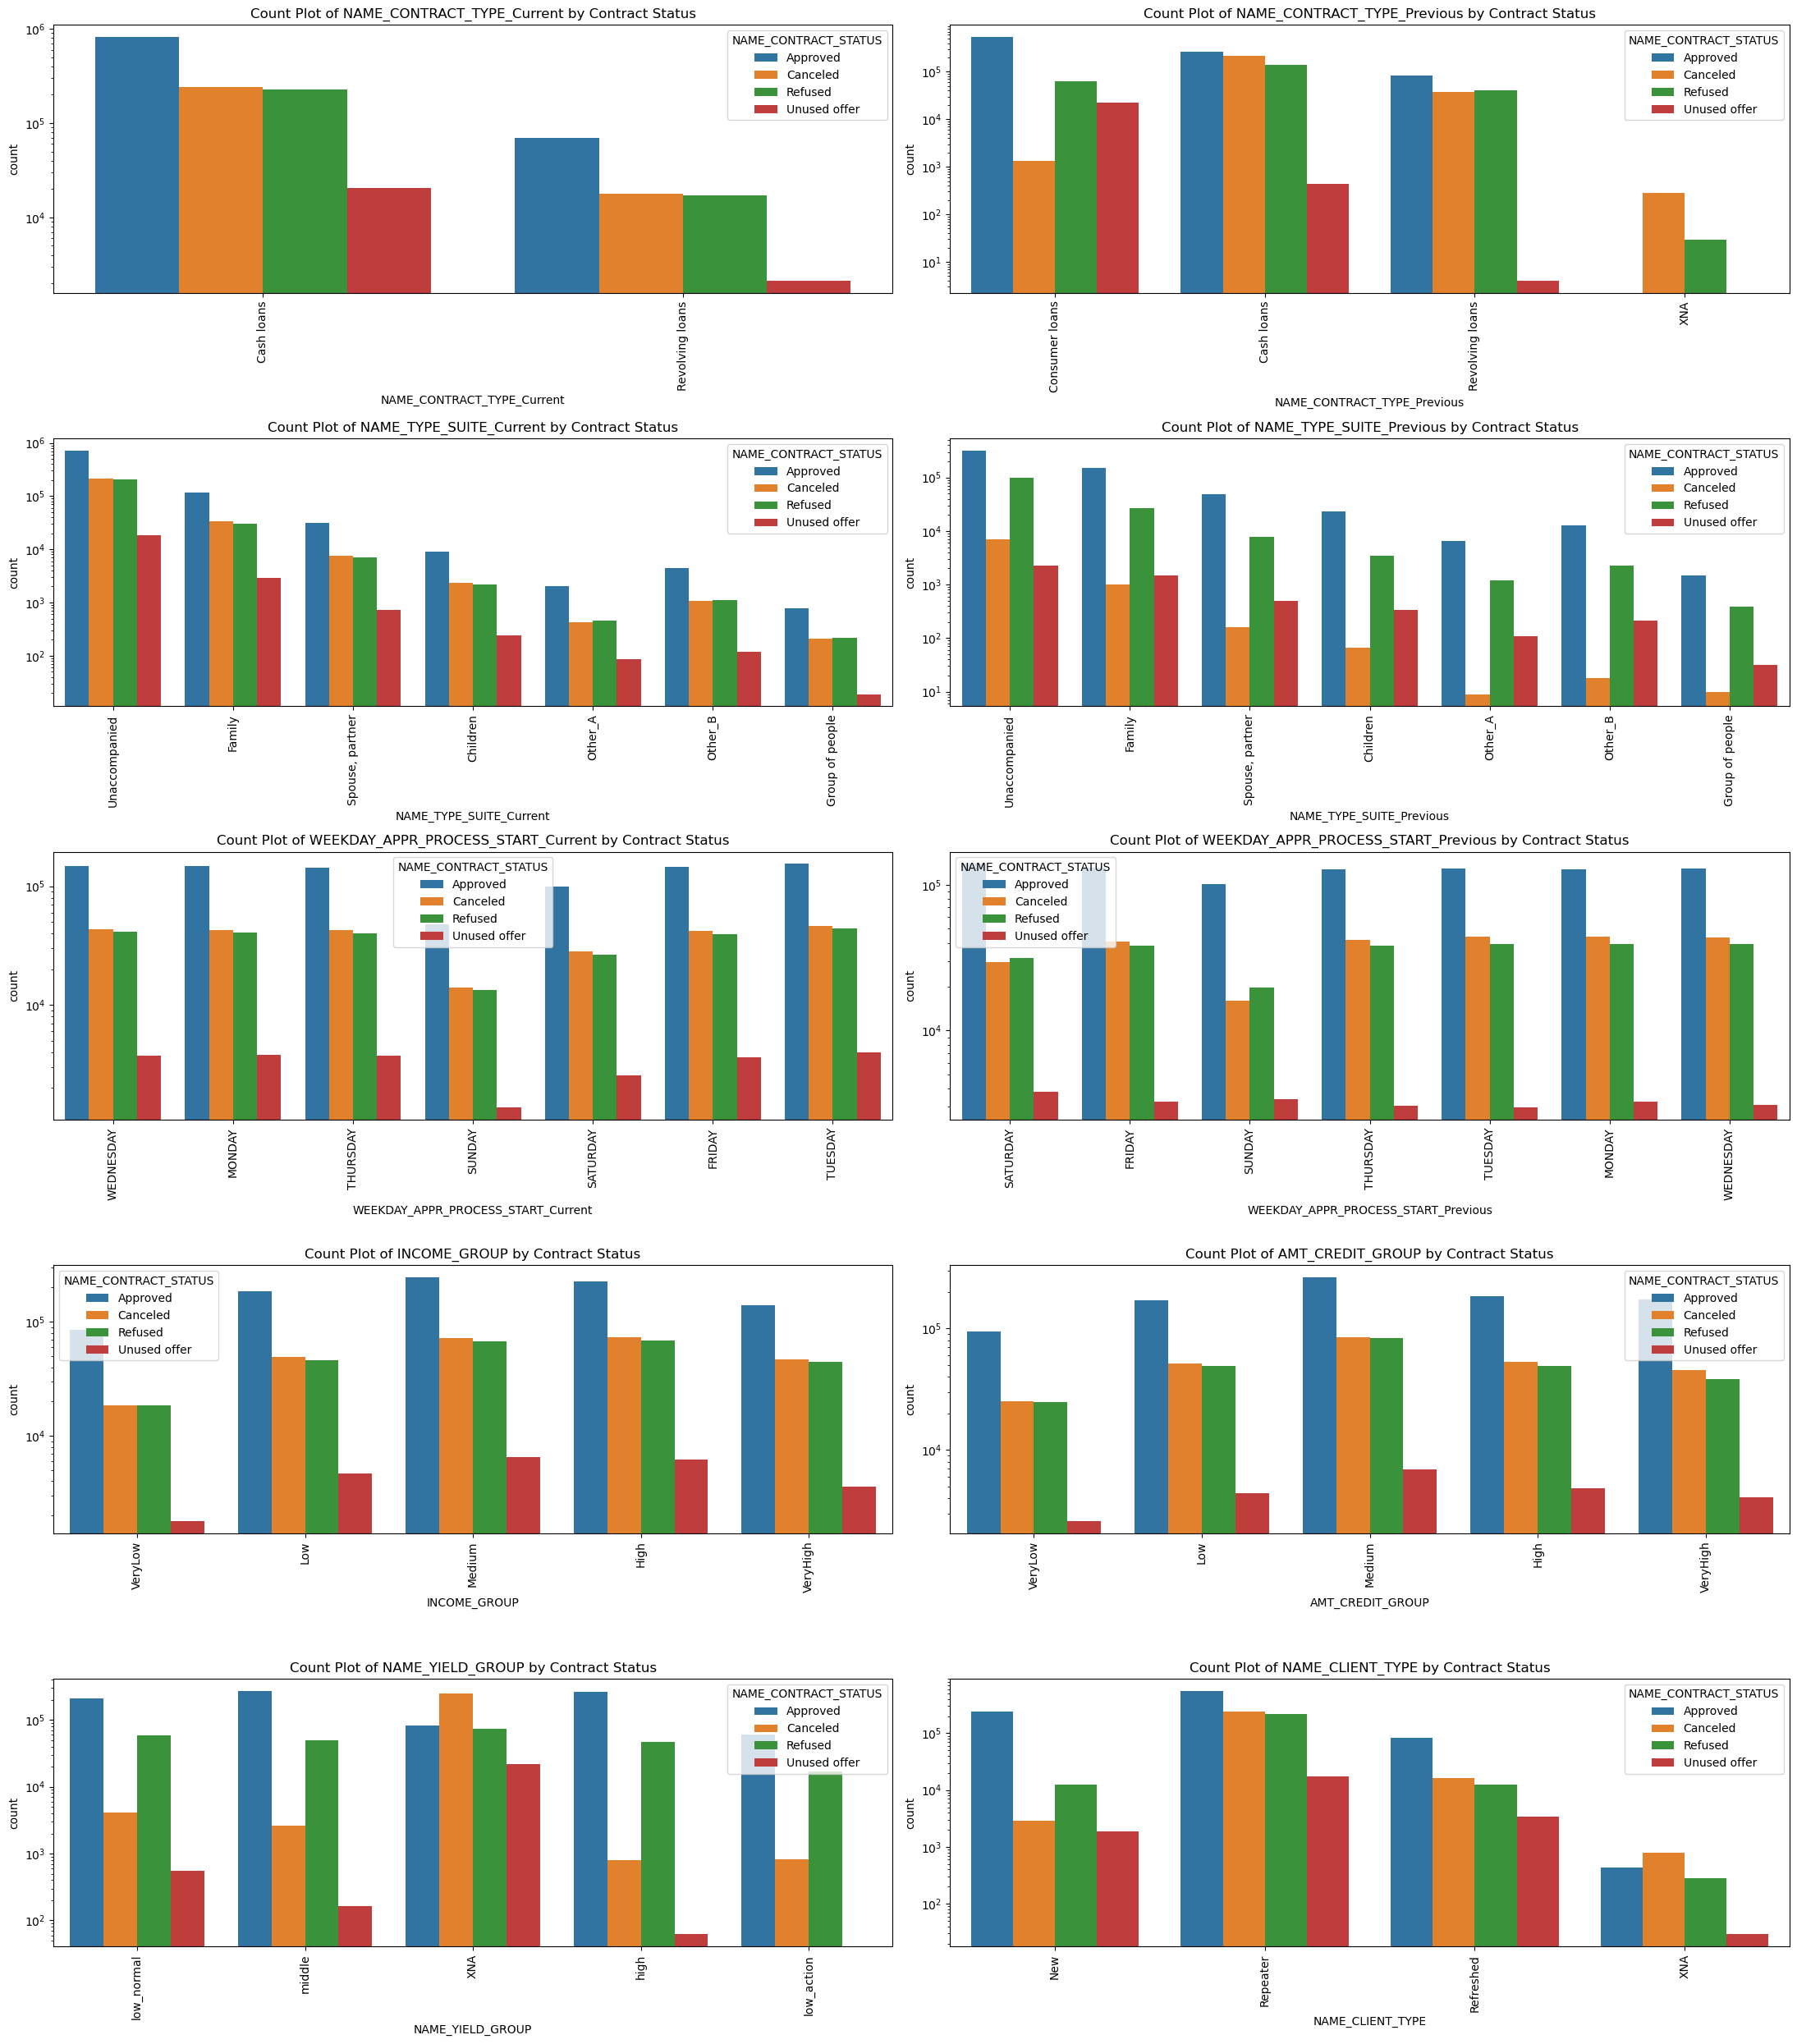

In [73]:
# Define the categorical columns
categorical_columns = ['NAME_CONTRACT_TYPE_Current', 'NAME_CONTRACT_TYPE_Previous',
                       'NAME_TYPE_SUITE_Current', 'NAME_TYPE_SUITE_Previous',
                       'WEEKDAY_APPR_PROCESS_START_Current', 'WEEKDAY_APPR_PROCESS_START_Previous',
                       'INCOME_GROUP', 'AMT_CREDIT_GROUP', 'NAME_YIELD_GROUP', 'NAME_CLIENT_TYPE']

plt.figure(figsize=(22, 25))

# Loop through the categorical columns and plot the count plots
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns) // 2 + len(categorical_columns) % 2, 2, i + 1)
    sns.countplot(x=col, hue='NAME_CONTRACT_STATUS', data=merged_df)
    plt.yscale('log')
    plt.xticks(rotation=90)
    plt.title(f'Count Plot of {col} by Contract Status')

plt.tight_layout()
plt.show()


#### Observations

- Repeat applicants have the highest number of approved loans.

- The middle NAME_YIELD_GROUP has the highest approval rate.

- The value of AMT_CREDIT_GROUP does not influence loan approvals.

- The highest approval rate is for the medium INCOME_GROUP.

- In previous applications, Saturday had the highest approval rate, but in current applications, it is Tuesday.

- In both NAME_CONTRACT_TYPE_Previous and NAME_CONTRACT_TYPE_Current, 'Unaccompanied' has the highest number.

- Currently, the bank is only offering two types of loans: Cash and Revolving Loans.

- Previously, the bank provided Cash, Revolving, and Consumer loans.

- The number of consumer loans was highest previously, but now the highest number is Cash loans.


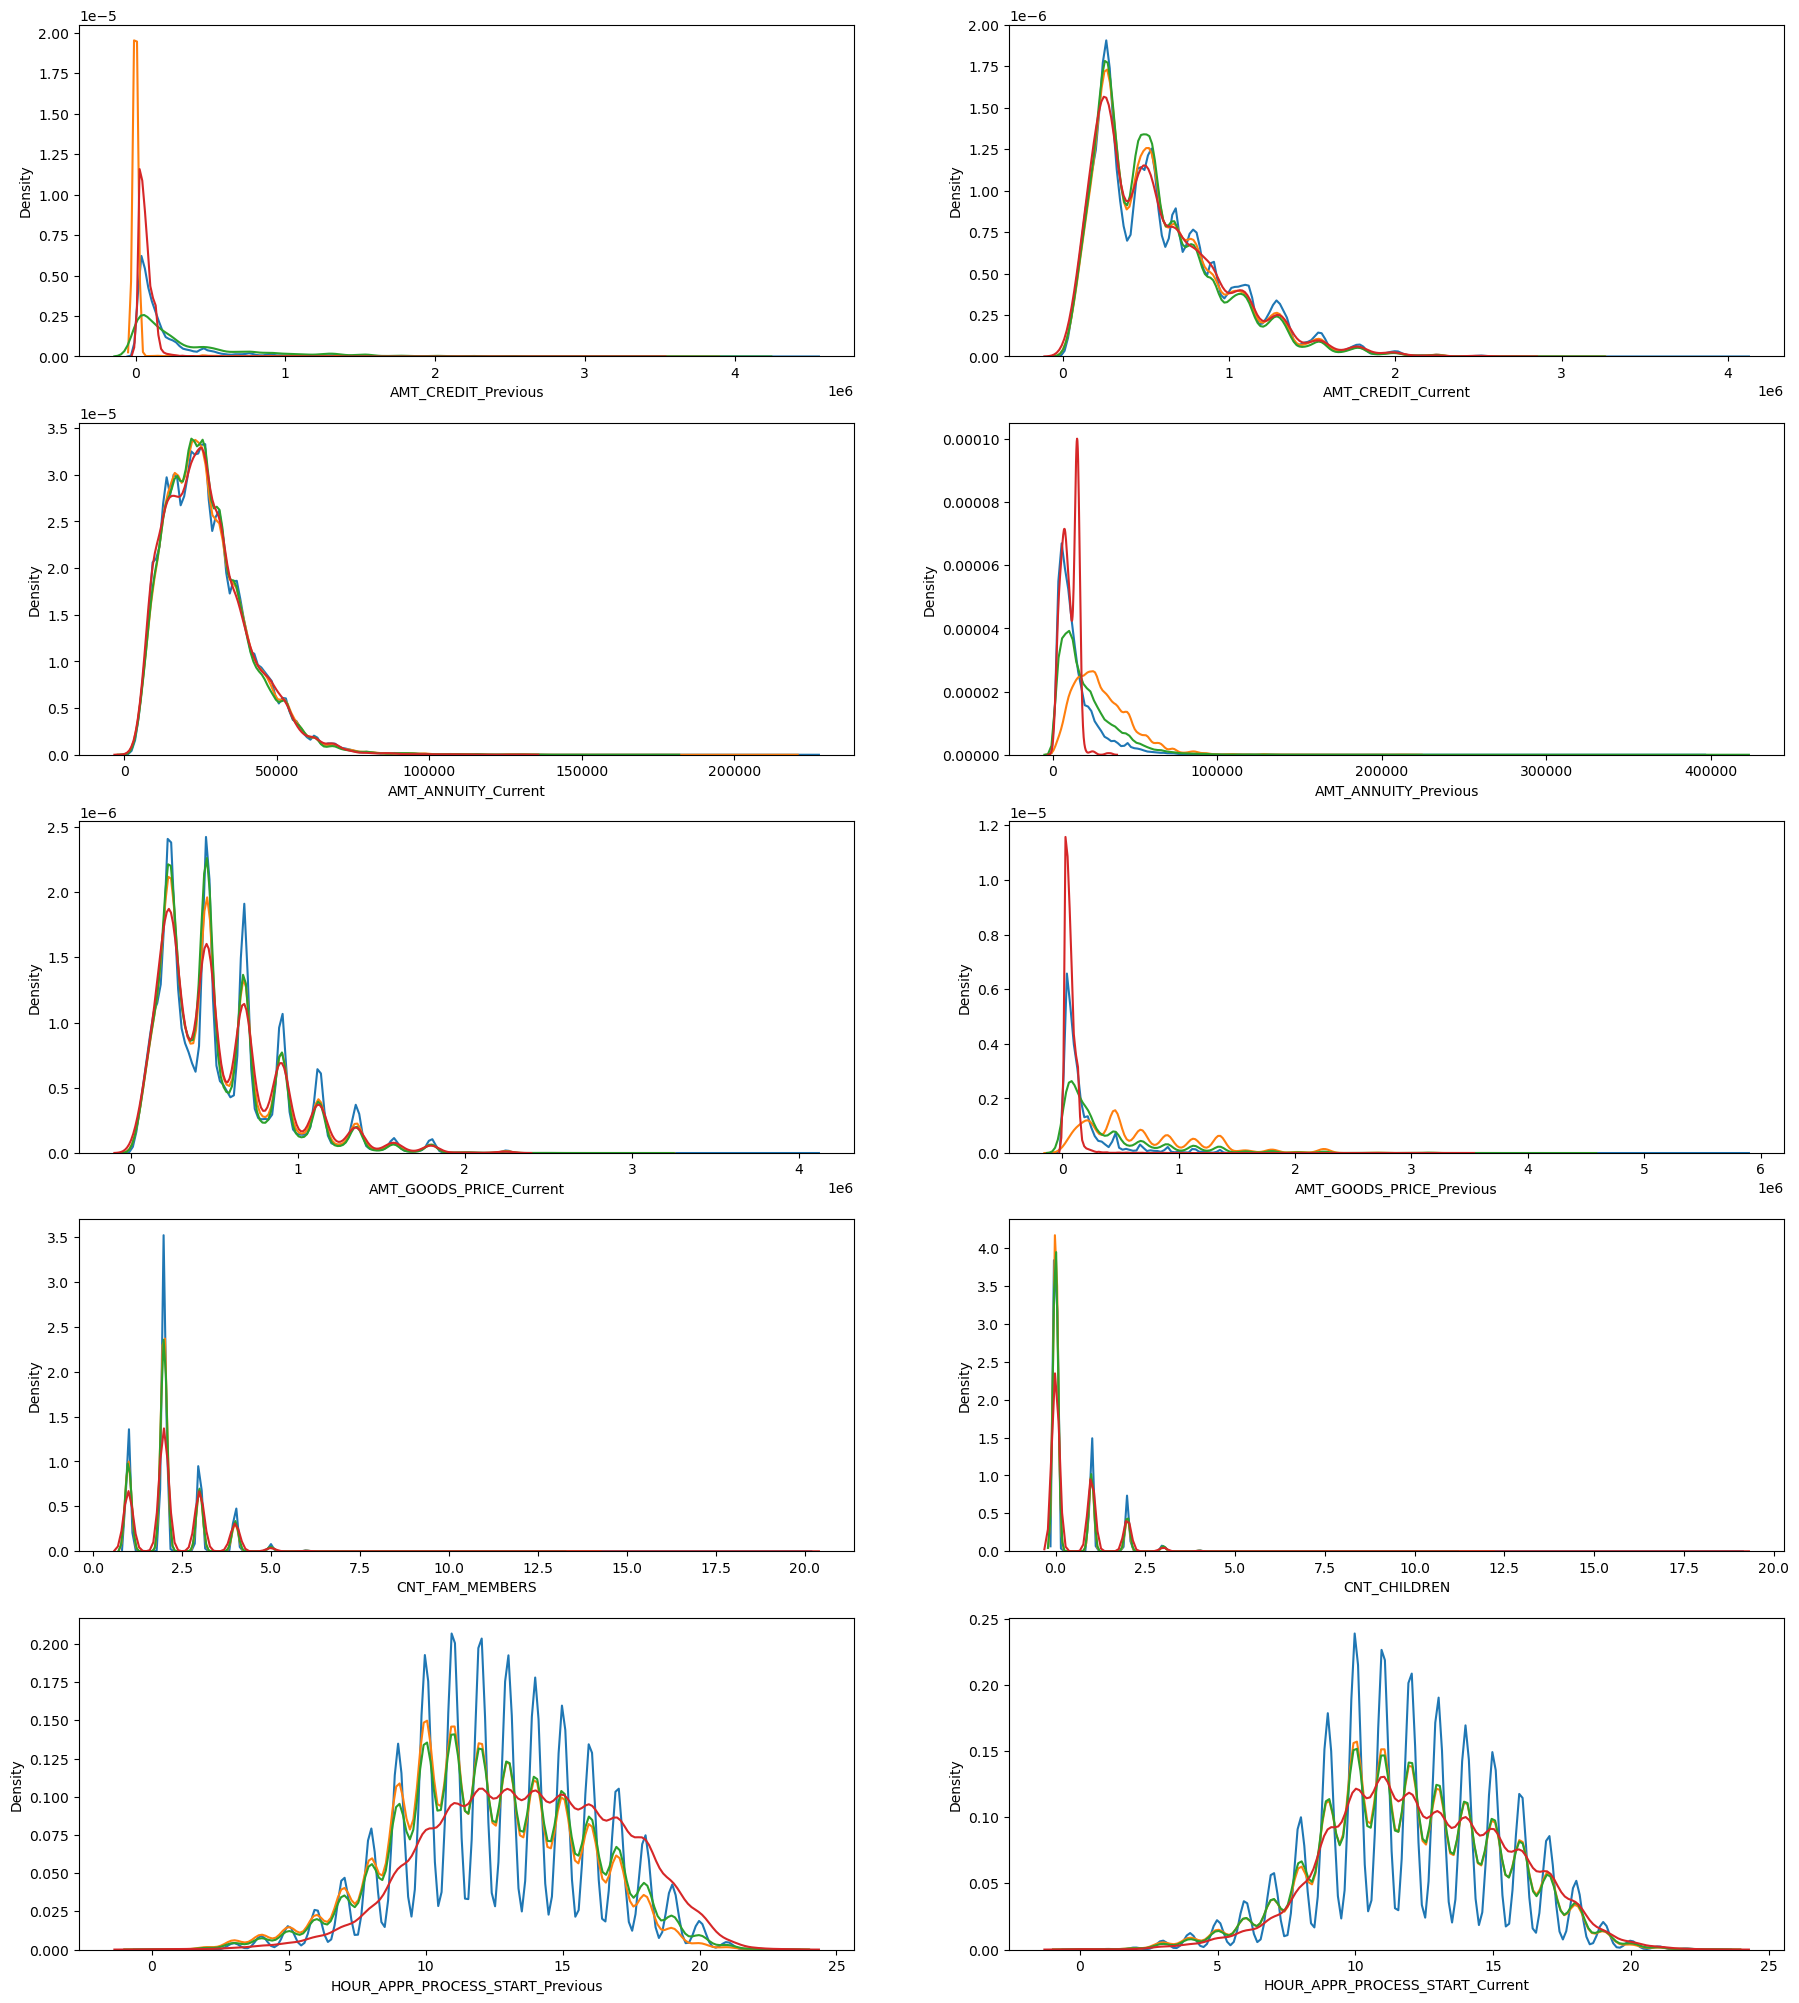

In [76]:
# Univariate Numerical analysis
continous_columns=['AMT_CREDIT_Previous','AMT_CREDIT_Current','AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),hist=False,label='Approved')
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),hist=False,label='Canceled',kde_kws={'bw':0.1})
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),hist=False,label='Refused',kde_kws={'bw':0.1})
    # we added kde_kws={'bw':0.1} in parameter to overcome bandwidth limitation.
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),hist=False,label='Unused offer')

plt.show()

### Observations

- A high number of applications are submitted between 9 AM and 2 PM for both current and previous data.

- The busiest hours for the bank are from 9 AM to 2 PM.

- Nuclear families tend to take out more loans.

- Previously, the bank had a high number of unused offers, but currently, the number of refused offers is high for AMT_GOODS_PRICE.

- Previously, the bank had a high number of unused offers, and currently, the number of cancelled/refused offers is similar for AMT_ANNUITY.

- Previously, the bank had a high number of unused offers, and currently, there is a high number of refused offers for AMT_CREDIT.

## Bivariate Analysis

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69528
Canceled                        241552            17889
Refused                         228351            17039
Unused offer                     20641             2130


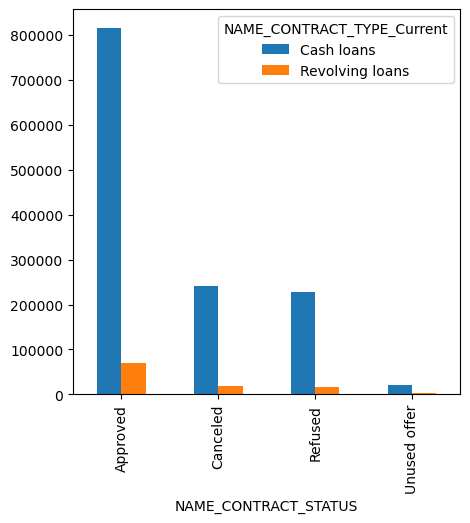

In [77]:
plot6= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CONTRACT_TYPE_Current'])
print(plot6)
plot6.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

- Cash loans have the highest count of Approved loans

NAME_INCOME_TYPE      Commercial associate  Maternity leave  Pensioner  \
NAME_CONTRACT_STATUS                                                     
Approved                            198507               10     170144   
Canceled                             59785                2      57674   
Refused                              58117                3      43802   
Unused offer                          5072                1       1924   

NAME_INCOME_TYPE      State servant  Student  Unemployed  Working  
NAME_CONTRACT_STATUS                                               
Approved                      61630       20          68   455720  
Canceled                      15679        3          16   126282  
Refused                       15597        1          38   127832  
Unused offer                   1518        0           1    14255  


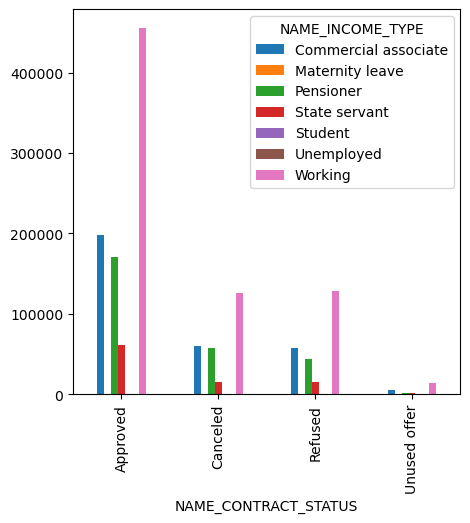

In [78]:
plot7= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_INCOME_TYPE'])
print(plot7)
plot7.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


- Highest number of approvals for working applicant

NAME_EDUCATION_TYPE   Academic degree  Higher education  Incomplete higher  \
NAME_CONTRACT_STATUS                                                         
Approved                          418            195002              27676   
Canceled                           64             57074               7917   
Refused                            91             54051               8635   
Unused offer                        6              6718                983   

NAME_EDUCATION_TYPE   Lower secondary  Secondary / secondary special  
NAME_CONTRACT_STATUS                                                  
Approved                        10929                         652074  
Canceled                         3099                         191287  
Refused                          2971                         179642  
Unused offer                      165                          14899  


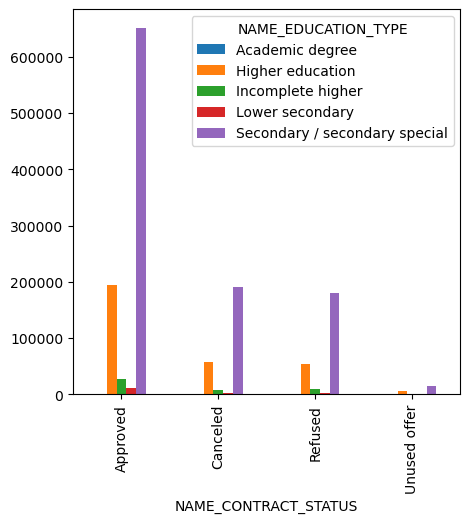

In [79]:
plot8= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_EDUCATION_TYPE'])
print(plot8)
plot8.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


- Highest number of approvals for Secondary/secondary special educated applicant

NAME_FAMILY_STATUS    Civil marriage  Married  Separated  \
NAME_CONTRACT_STATUS                                       
Approved                       86827   577137      56750   
Canceled                       26143   167233      16535   
Refused                        28226   152167      16453   
Unused offer                    1961    14373       1600   

NAME_FAMILY_STATUS    Single / not married  Widow  
NAME_CONTRACT_STATUS                               
Approved                            114880  50505  
Canceled                             33403  16127  
Refused                              34292  14252  
Unused offer                          4082    755  


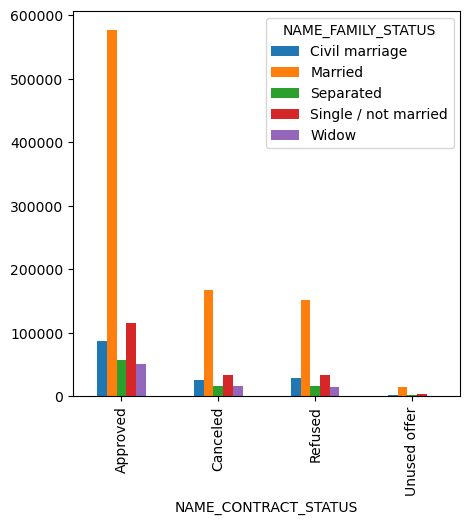

In [80]:
plot9= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_FAMILY_STATUS'])
print(plot9)
plot9.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


- Highest number of approvals for Married applicant

NAME_HOUSING_TYPE     Co-op apartment  House / apartment  Municipal apartment  \
NAME_CONTRACT_STATUS                                                            
Approved                         2788             791667                33138   
Canceled                          629             234120                 9149   
Refused                           659             219301                 8544   
Unused offer                      313              19864                  702   

NAME_HOUSING_TYPE     Office apartment  Rented apartment  With parents  
NAME_CONTRACT_STATUS                                                    
Approved                          7319             12608         38579  
Canceled                          1926              3385         10232  
Refused                           2005              3514         11367  
Unused offer                       178               278          1436  


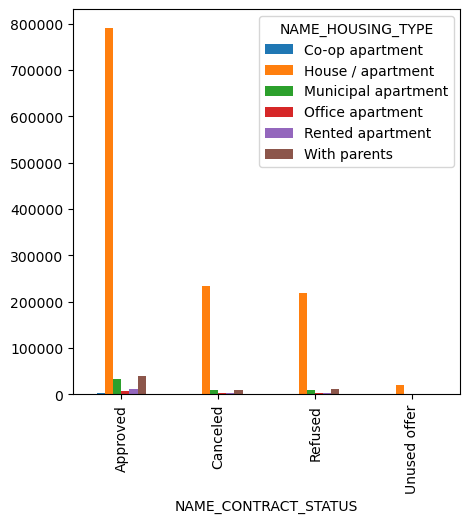

In [81]:
plot10= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_HOUSING_TYPE'])
print(plot10)
plot10.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


- Highest number of approvals for House/apartment owner.

NAME_CONTRACT_TYPE_Previous  Cash loans  Consumer loans  Revolving loans  XNA
NAME_CONTRACT_STATUS                                                         
Approved                         266381          537310            82408    0
Canceled                         220383            1329            37445  284
Refused                          139568           64282            41511   29
Unused offer                        432           22335                4    0


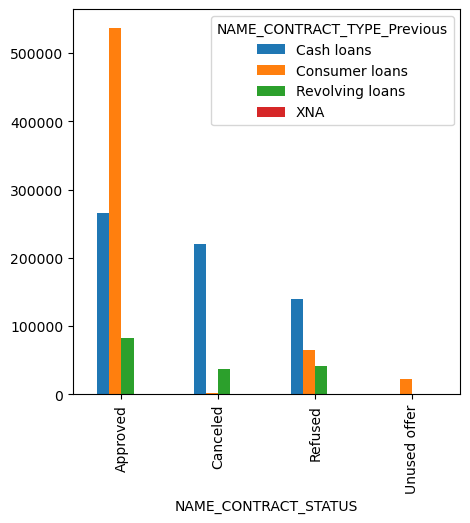

In [82]:
plot11= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CONTRACT_TYPE_Previous'])
print(plot11)
plot11.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


- Highest number of approvals for Consumer Loans.

NAME_CLIENT_TYPE         New  Refreshed  Repeater  XNA
NAME_CONTRACT_STATUS                                  
Approved              242395      82891    560378  435
Canceled                2920      16104    239618  799
Refused                12358      12537    220215  280
Unused offer            1867       3404     17471   29


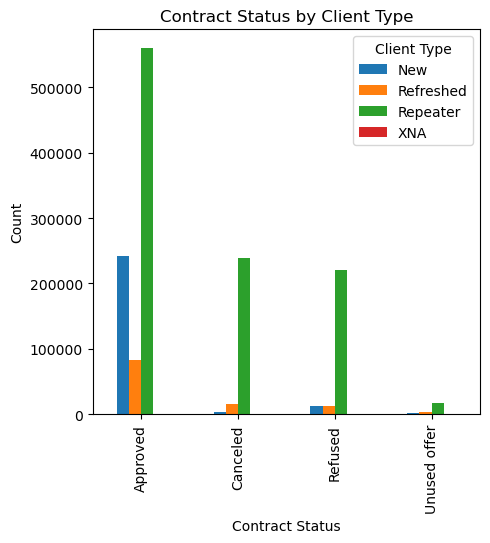

In [91]:
# Create a crosstab
plot12 = pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'], columns=merged_df['NAME_CLIENT_TYPE'])

# Print the crosstab
print(plot12)

# Plot the crosstab
plot12.plot(kind="bar", figsize=(5, 5), stacked=False)
plt.title('Contract Status by Client Type')
plt.xlabel('Contract Status')
plt.ylabel('Count')
plt.legend(title='Client Type')
plt.show()


NAME_CLIENT_TYPE         New  Refreshed  Repeater  XNA
NAME_CONTRACT_STATUS                                  
Approved              242395      82891    560378  435
Canceled                2920      16104    239618  799
Refused                12358      12537    220215  280
Unused offer            1867       3404     17471   29


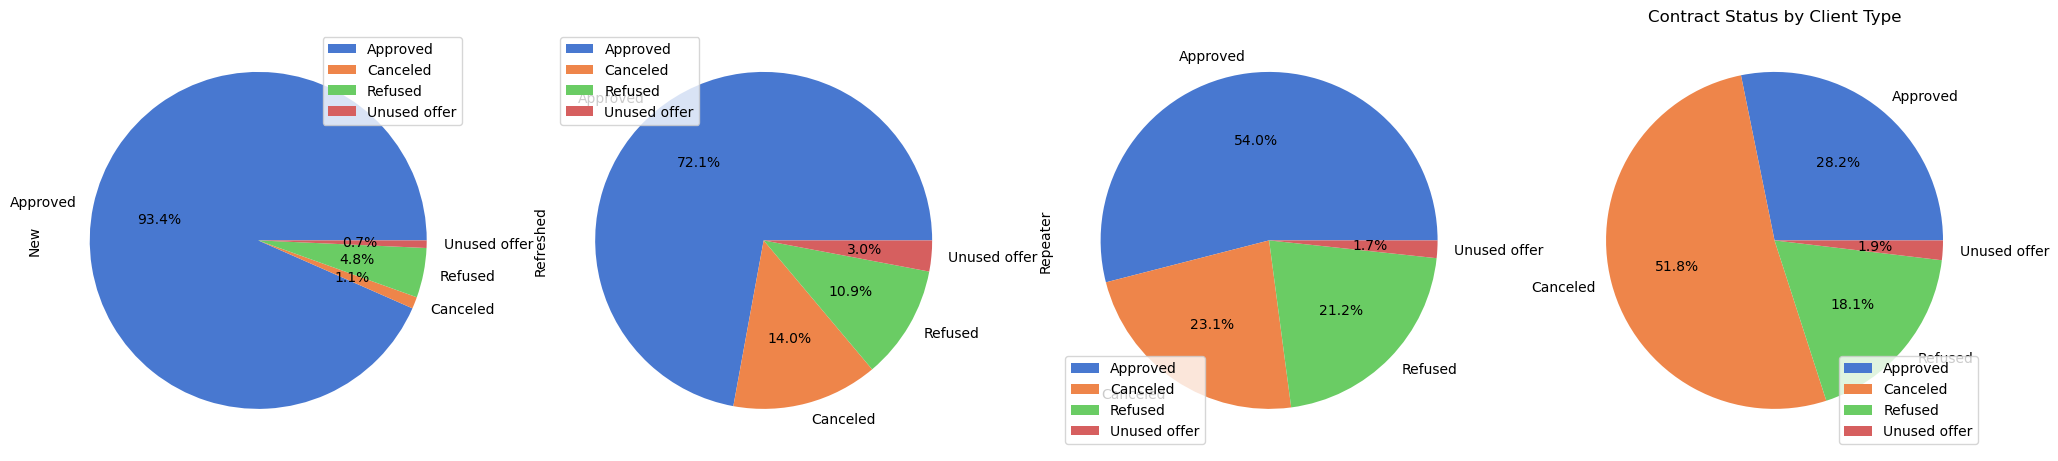

In [100]:
# Create a crosstab
plot12 = pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'], columns=merged_df['NAME_CLIENT_TYPE'])

# Print the crosstab
print(plot12)

# Plot the crosstab as a pie chart
plot12.plot(kind="pie", subplots=True, figsize=(25, 25), autopct='%1.1f%%', colors=sns.color_palette("muted"))
plt.title('Contract Status by Client Type')
plt.ylabel('')
plt.show()


- repeated applications got approved most number of times

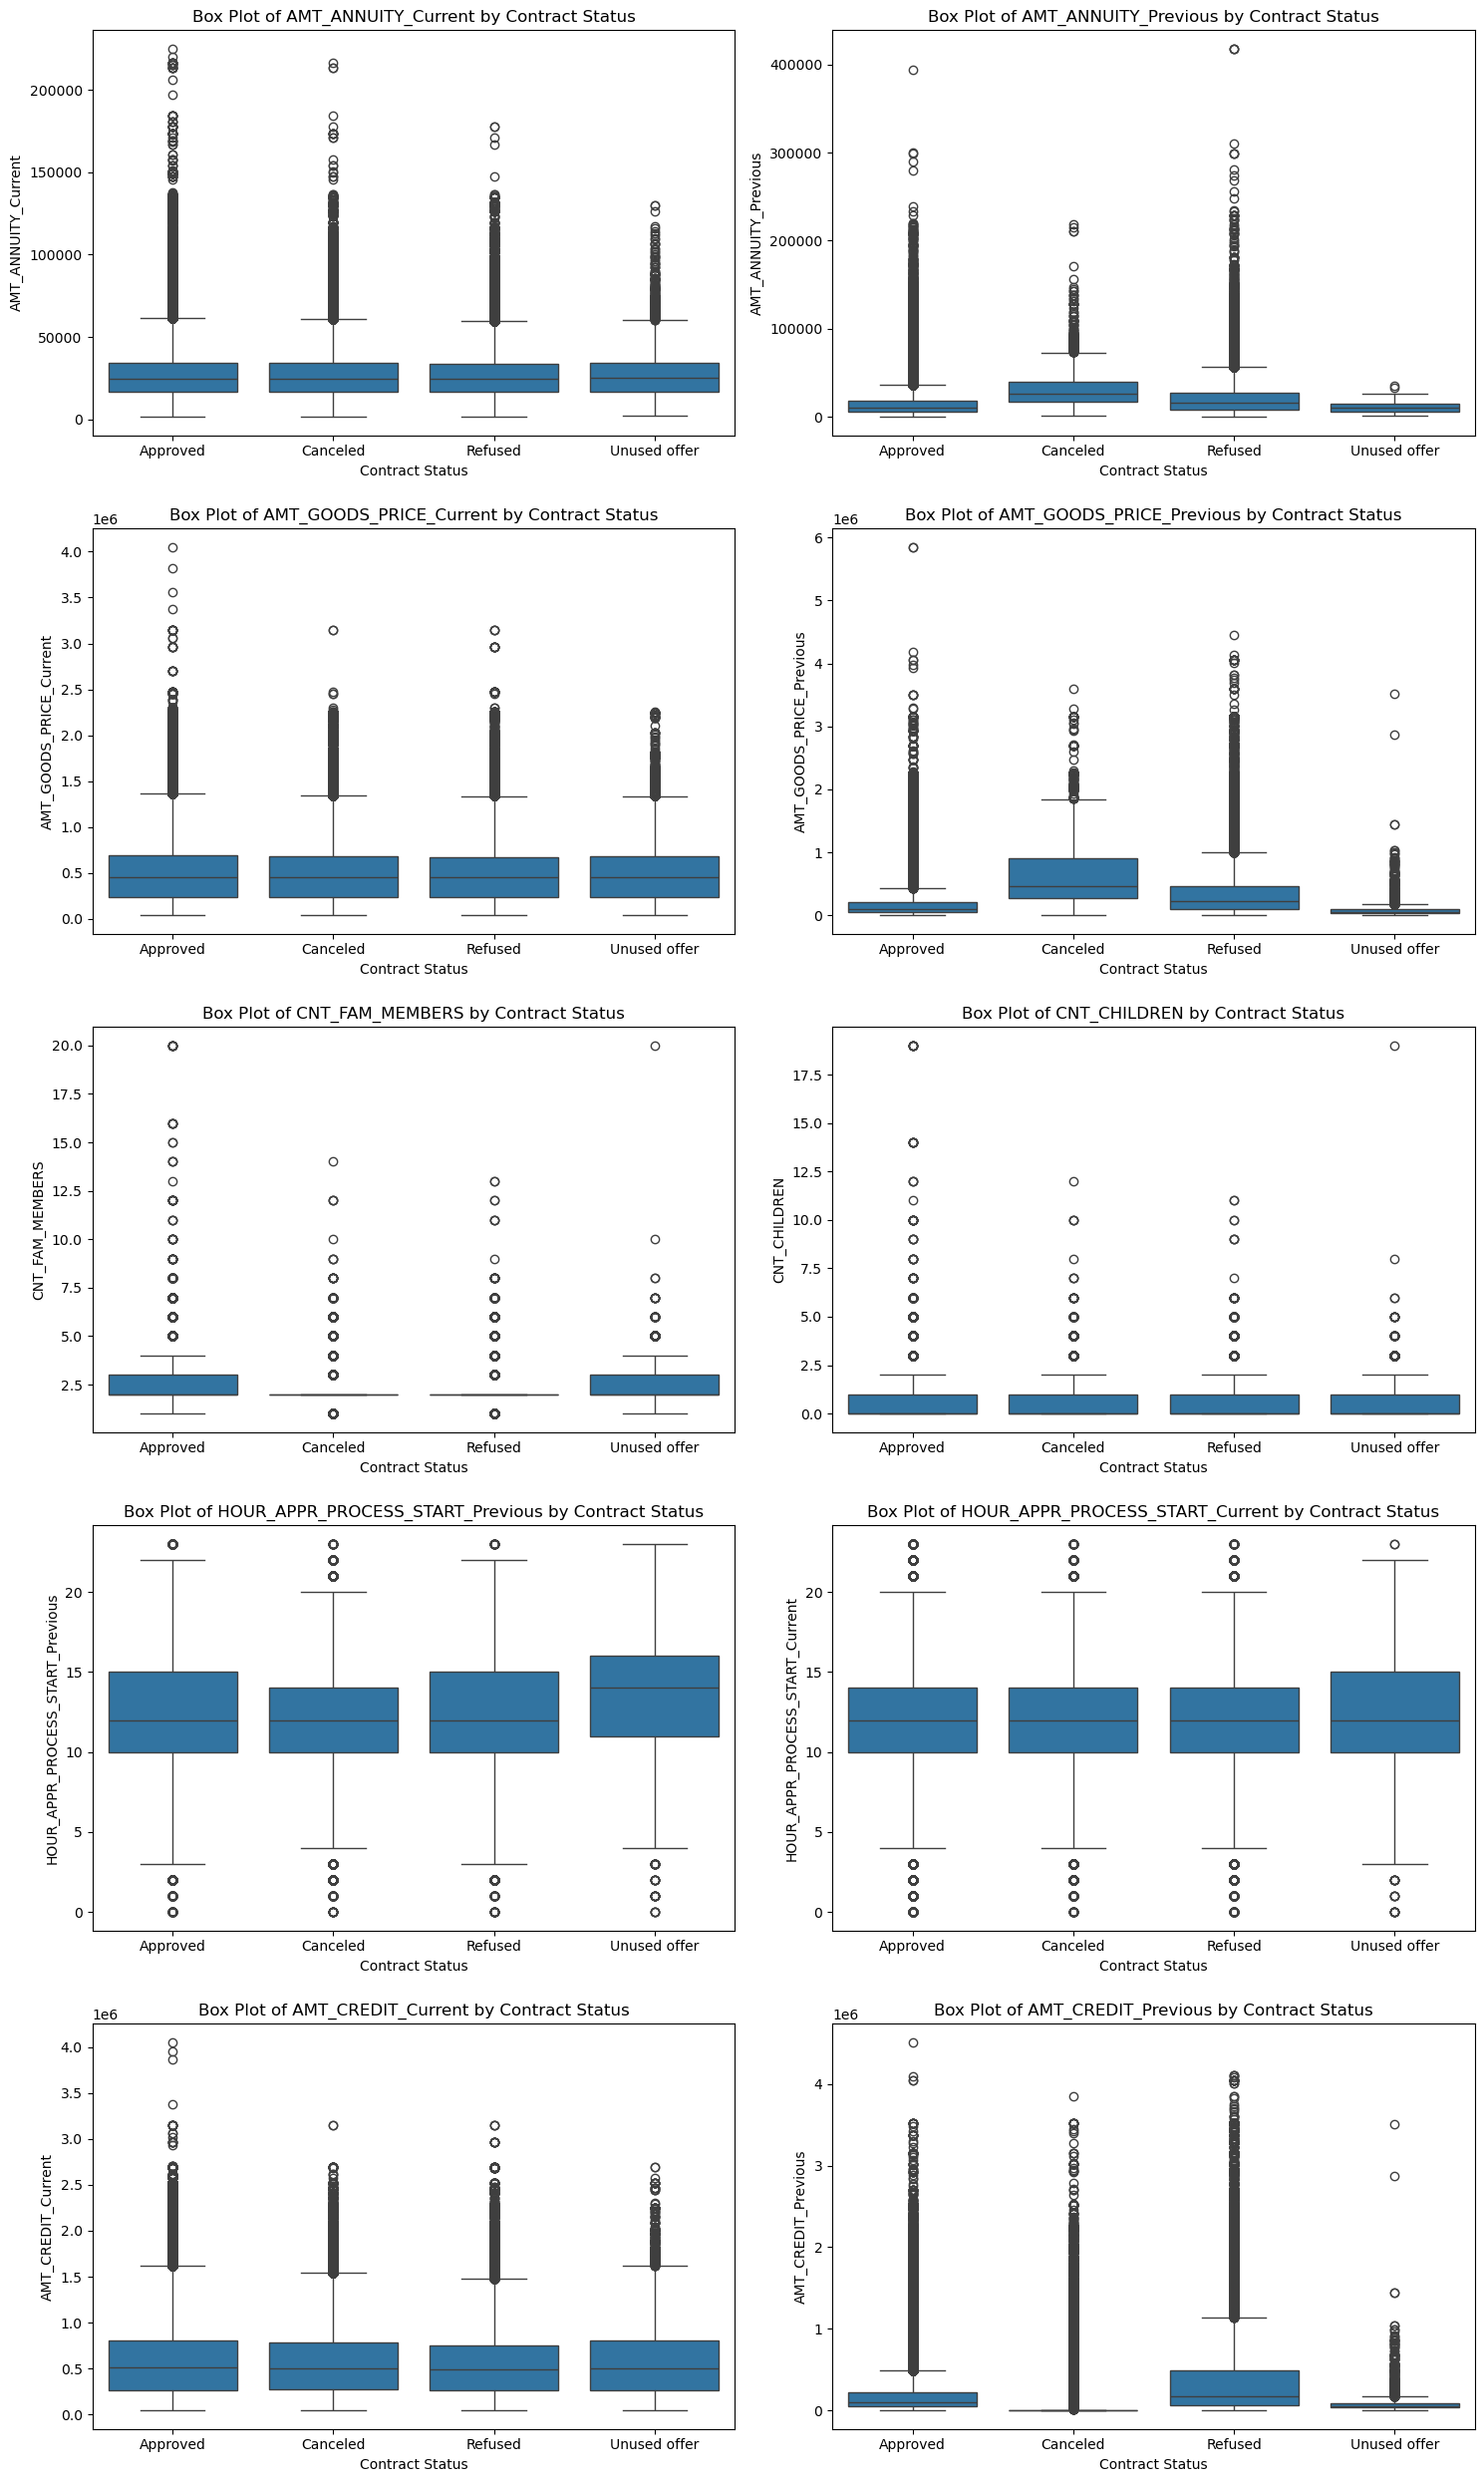

In [85]:
# Define the continuous columns
continuous_columns = ['AMT_ANNUITY_Current', 'AMT_ANNUITY_Previous',
                      'AMT_GOODS_PRICE_Current', 'AMT_GOODS_PRICE_Previous', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN',
                      'HOUR_APPR_PROCESS_START_Previous', 'HOUR_APPR_PROCESS_START_Current',
                      'AMT_CREDIT_Current', 'AMT_CREDIT_Previous']

plt.figure(figsize=(15, 25))

# Loop through the continuous columns and plot the box plots
for i, col in enumerate(continuous_columns):
    plt.subplot(len(continuous_columns) // 2 + len(continuous_columns) % 2, 2, i + 1)
    sns.boxplot(x='NAME_CONTRACT_STATUS', y=col, data=merged_df)
    plt.title(f'Box Plot of {col} by Contract Status')
    plt.xlabel('Contract Status')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


- AMT_CREDIT_Previous has the highest number of refused cases, while AMT_CREDIT_Current is consistent across all four categories.

- The time spent on unused offers is higher compared to other categories, suggesting that the bank should reduce this time.

- Nuclear families (2-3 members) receive the highest approval rates.

- Previously, most applications were either cancelled or refused, but now Refused/Cancelled/Approved/Unused categories are similar for AMT_GOODS_PRICE.

- Previously, most applications were either cancelled or refused, but now Refused/Cancelled/Approved/Unused categories are similar for AMT_ANNUITY.

### Final Obsevations

- Target/focused variable for Application dataset - TARGET
- Target/focused variable for Previous dataset - NAME_CONTRACT_STATUS

- Top Major variables to consider for loan prediction:

1- NAME_EDUCATION_TYPE
2- AMT_INCOME_TOTAL
3- DAYS_BIRTH(AGE_IN_YEARS)
4- AMT_CREDIT
5- DAYS_EMPLOYED(YEARS_EMPLOYED)
6- AMT_ANNUITY
7- NAME_INCOME_TYPE
8- CODE_GENDER
9- NAME_HOUSING_TYPE

- The above mentioned variables are to be considered before approving application to minimize risk of loss.